# [Coding Master]  코로나데이터 시각화

### Class 3, Team 4: 강보배, 박종석, 이주형 

## 주제: 광역단위별 사망, 확진자 비교하기

### 세부 주제
> 1. 전국단위 사망자 및 확진자 시각화
> 2. 광역단위별 사망자 및 확진자 시각화
> 3. 광역단위별 사망자 및 확진자 상관관계 분석(지역 특성, 날씨)
> 4. 광역단위별 슈퍼 전파자 시각화

## 1. 데이터 정보

### 1-1 일자-지역별 누적 확진자 및 사망자 정보: TimeProvince.csv

> * date: 2020.01.20 ~ 06.30
> * time: 0 = AM 12:00 / 16 = PM 04:00
> * province: 광역자치단체
> * confirmed: 누적 확진자 수
> * deseased: 누적 사망자 수
> * 데이터: 2770 행

In [7]:
tp.head()

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

In [8]:
tp.describe()

time    confirmed     released     deceased
count  2771.000000  2771.000000  2771.000000  2771.000000
mean      4.122699   444.308192   320.726453     9.239986
std       6.998873  1360.890963  1126.041255    32.638615
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     9.000000     1.000000     0.000000
50%       0.000000    42.000000    21.000000     0.000000
75%      16.000000   133.000000    92.000000     1.000000
max      16.000000  6906.000000  6700.000000   189.000000

### 1-2 지역정보: Region.csv

> * code: 지역 코드
> * province: 광역자치단체
> * city: 기초자치단체
> * 지역 특성: 초등학교 수, 유치원 수, 대학 수, 요양원 수, 아카데미 비율, 노인 인구 비율, 독거 노인 가구 비율
> * 데이터: 243 행

In [5]:
region.head()

code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080

In [6]:
region.describe()

code    latitude   longitude  elementary_school_count  \
count    244.000000  244.000000  244.000000               244.000000   
mean   32912.090164   36.396996  127.661401                74.180328   
std    19373.349736    1.060304    0.904781               402.713482   
min    10000.000000   33.488936  126.263554                 4.000000   
25%    14027.500000   35.405263  126.927663                14.750000   
50%    30075.000000   36.386601  127.384249                22.000000   
75%    51062.500000   37.466119  128.473953                36.250000   
max    80000.000000   38.380571  130.905883              6087.000000   

       kindergarten_count  university_count  academy_ratio  \
count          244.000000        244.000000     244.000000   
mean           107.901639          4.151639       1.294754   
std            588.788320         22.513041       0.592898   
min              4.000000          0.000000       0.190000   
25%             16.000000          0.000000       0.870000   
50%             31.000000          1.000000       1.270000   
75%             55.250000          3.000000       1.612500   
max           8837.000000        340.000000       4.180000   

       elderly_population_ratio  elderly_alone_ratio  nursing_home_count  
count                244.000000           244.000000          244.000000  
mean                  20.923730            10.644672         1159.258197  
std                    8.087428             5.604886         6384.185085  
min                    7.690000             3.300000           11.000000  
25%                   14.117500             6.100000          111.000000  
50%                   18.530000             8.750000          300.000000  
75%                   27.262500            14.625000          694.500000  
max                   40.260000            24.700000        94865.000000

### 1-3 일자별 누적 정보: Time.csv

> * date: 2020.01.20 ~ 06.30
> * Time: 0 = AM 12:00 / 16 = PM 04:00
> * test: 누적 테스트 수
> * negative: 누적 음성 결과
> * confirmed: 누적 확진자 수
> * relaease: 누적 방출자 수
> * deceased: 누적 사망자 수
> * 데이터: 162 행

In [14]:
time.head()

date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0

In [15]:
time.describe()

time          test      negative     confirmed      released  \
count  163.000000  1.630000e+02  1.630000e+02    163.000000    163.000000   
mean     4.122699  4.977797e+05  4.754839e+05   7834.865031   5604.312883   
std      7.019174  3.958830e+05  3.865611e+05   4666.040541   4544.317229   
min      0.000000  1.000000e+00  0.000000e+00      1.000000      0.000000   
25%      0.000000  9.648800e+04  5.877400e+04   3443.000000     29.000000   
50%      0.000000  5.030510e+05  4.773030e+05  10450.000000   7117.000000   
75%     16.000000  7.825585e+05  7.542225e+05  11116.000000  10100.500000   
max     16.000000  1.273766e+06  1.240157e+06  12800.000000  11537.000000   

         deceased  
count  163.000000  
mean   157.104294  
std    114.010916  
min      0.000000  
25%     17.500000  
50%    208.000000  
75%    263.500000  
max    282.000000

### 1-4 환자정보: PatientInfo.csv

> * patient_id: 환자 인식 번호
> * sex: 성별
> * age: 연령대
> * country: 국가
> * province: 광역자치단체
> * city: 기초자치단체
> * infection_case: 감염경로
> * infected_by: 전파자
> * contact_number: 접촉 숫자
> * symptom_onset_date: 증상 발현 일자
> * confirmed_date: 확진 일자
> * released_date: 방출 일자
> * deceased_date: 사망 일자
> * state: 현재 상태

In [19]:
patient.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

### 1-5 지역별 날씨 정보(2016.01.01 ~2020.06.29): Weather.csv

> * code: 지역 코드
> * province: 광역자치단체
> * date: 누적 테스트 수
> * avg_temp: 평균 기온
> * min_temp: 최소 기온
> * max_temp: 최대 기온
> * precipitation: 강수량
> * max_wind_speed: 최대 풍속
> * most_wind_direction: 평균 풍속
> * avg_relative_humidity: 평균 습도
> * 데이터: 26270 행

In [10]:
weather.head()

code province        date  avg_temp  min_temp  max_temp  precipitation  \
0  10000    Seoul  2016-01-01       1.2      -3.3       4.0            0.0   
1  11000    Busan  2016-01-01       5.3       1.1      10.9            0.0   
2  12000    Daegu  2016-01-01       1.7      -4.0       8.0            0.0   
3  13000  Gwangju  2016-01-01       3.2      -1.5       8.1            0.0   
4  14000  Incheon  2016-01-01       3.1      -0.4       5.7            0.0   

   max_wind_speed  most_wind_direction  avg_relative_humidity  
0             3.5                 90.0                   73.0  
1             7.4                340.0                   52.1  
2             3.7                270.0                   70.5  
3             2.7                230.0                   73.1  
4             5.3                180.0                   83.9

In [13]:
weather.describe()

code      avg_temp      min_temp      max_temp  precipitation  \
count  26271.000000  26256.000000  26266.000000  26268.000000   26271.000000   
mean   32124.662175     13.859423      9.665396     18.778826       1.486799   
std    20313.487872      9.520334      9.896768      9.586279       8.189636   
min    10000.000000    -14.800000    -19.200000    -11.900000       0.000000   
25%    13500.000000      6.000000      1.400000     10.900000       0.000000   
50%    20000.000000     14.600000      9.900000     19.800000       0.000000   
75%    50500.000000     21.900000     18.200000     26.700000       0.000000   
max    70000.000000     33.900000     30.300000     40.000000     266.000000   

       max_wind_speed  most_wind_direction  avg_relative_humidity  
count    26262.000000         26242.000000           26251.000000  
mean         5.109500           195.900084              65.695566  
std          2.016256           106.166524              17.195339  
min          1.000000            20.000000              10.400000  
25%          3.800000            90.000000              53.600000  
50%          4.700000           200.000000              66.900000  
75%          6.000000           290.000000              78.600000  
max         29.400000           360.000000             100.000000

## [시각화 주제 1] 전국단위 사망자 및 확진자 시각화

In [ ]:
$ pip install folium
$ pip install pydeck
$ sudo apt-get install gdal-bin

In [20]:
import numpy as np
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import requests
import branca
import pydeck as pdk

### 1-1. 전국 누적 확진자 및 누적 사망자 추세(2020.01.20 ~ 06.30 기준)

Text(0.5, 1.0, 'Time-Covid19')

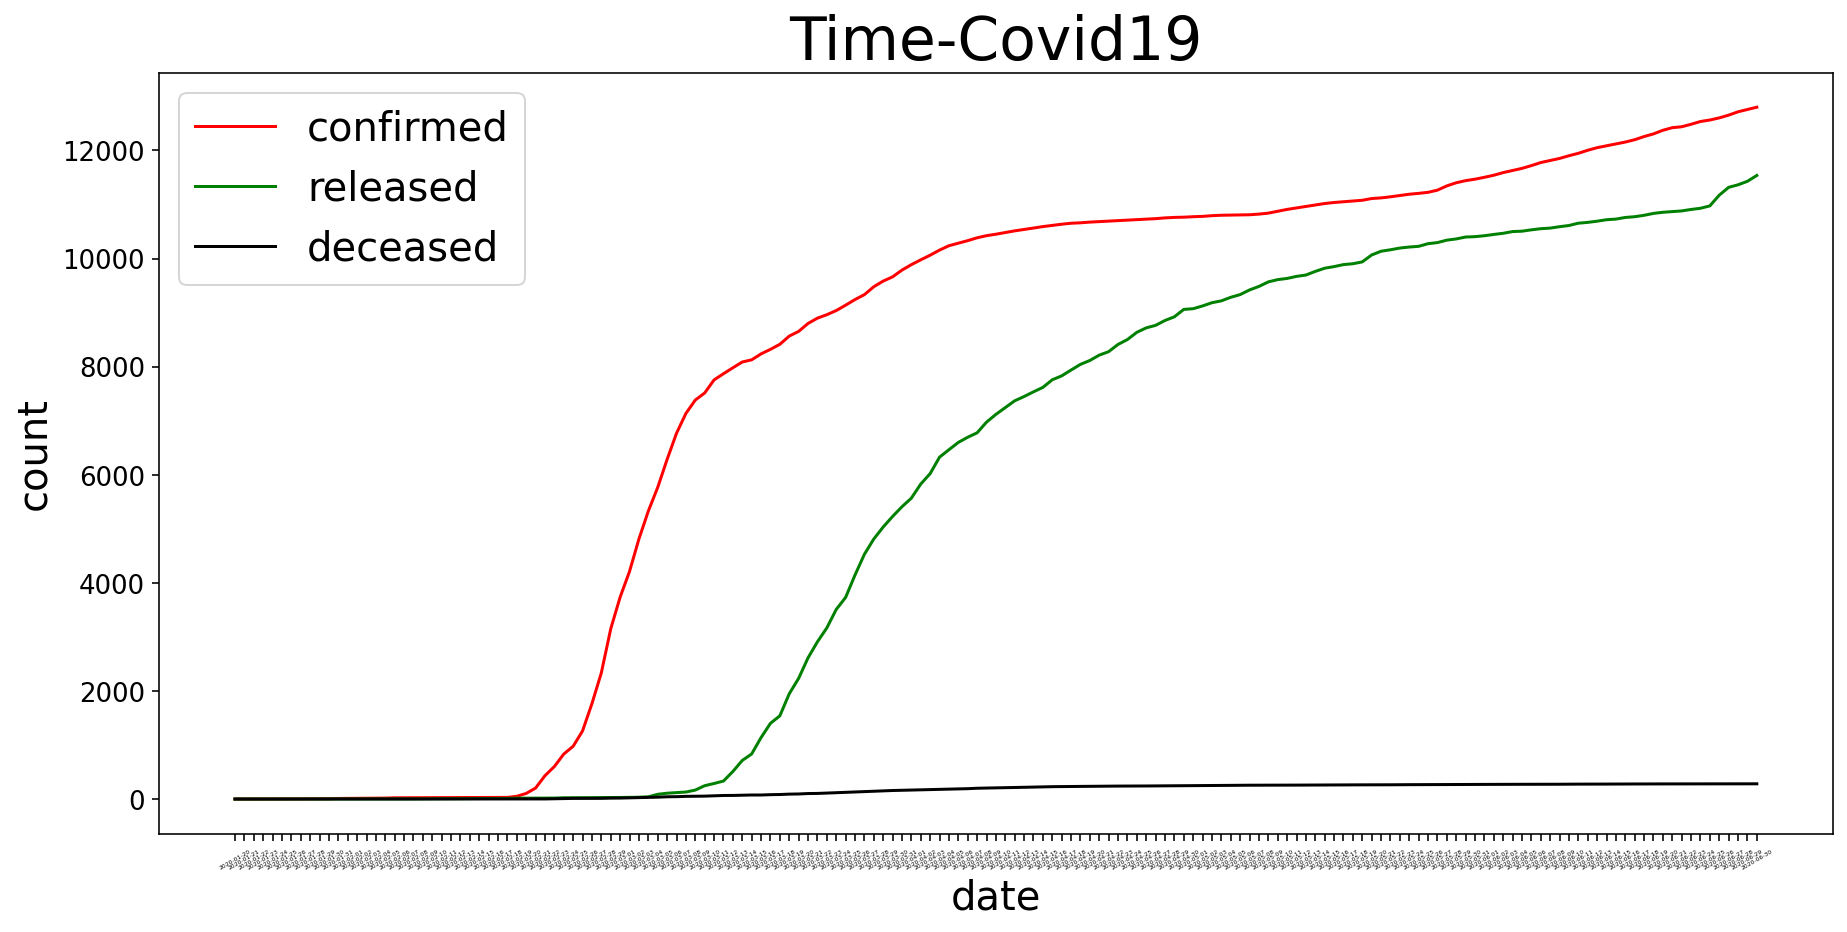

In [6]:
# 시간경과에 따라 확진자, 사망자 증가 추세 모두 표시

plt.figure(figsize=(15,7))
plt.plot(time['date'], time['confirmed'], color='red')
plt.plot(time['date'], time['released'], color='green')
plt.plot(time['date'], time['deceased'], color='black')
plt.xticks(rotation=30, size=3)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.legend(['confirmed','released','deceased'], loc='best', fontsize=20)
plt.title('Time-Covid19', size=30)

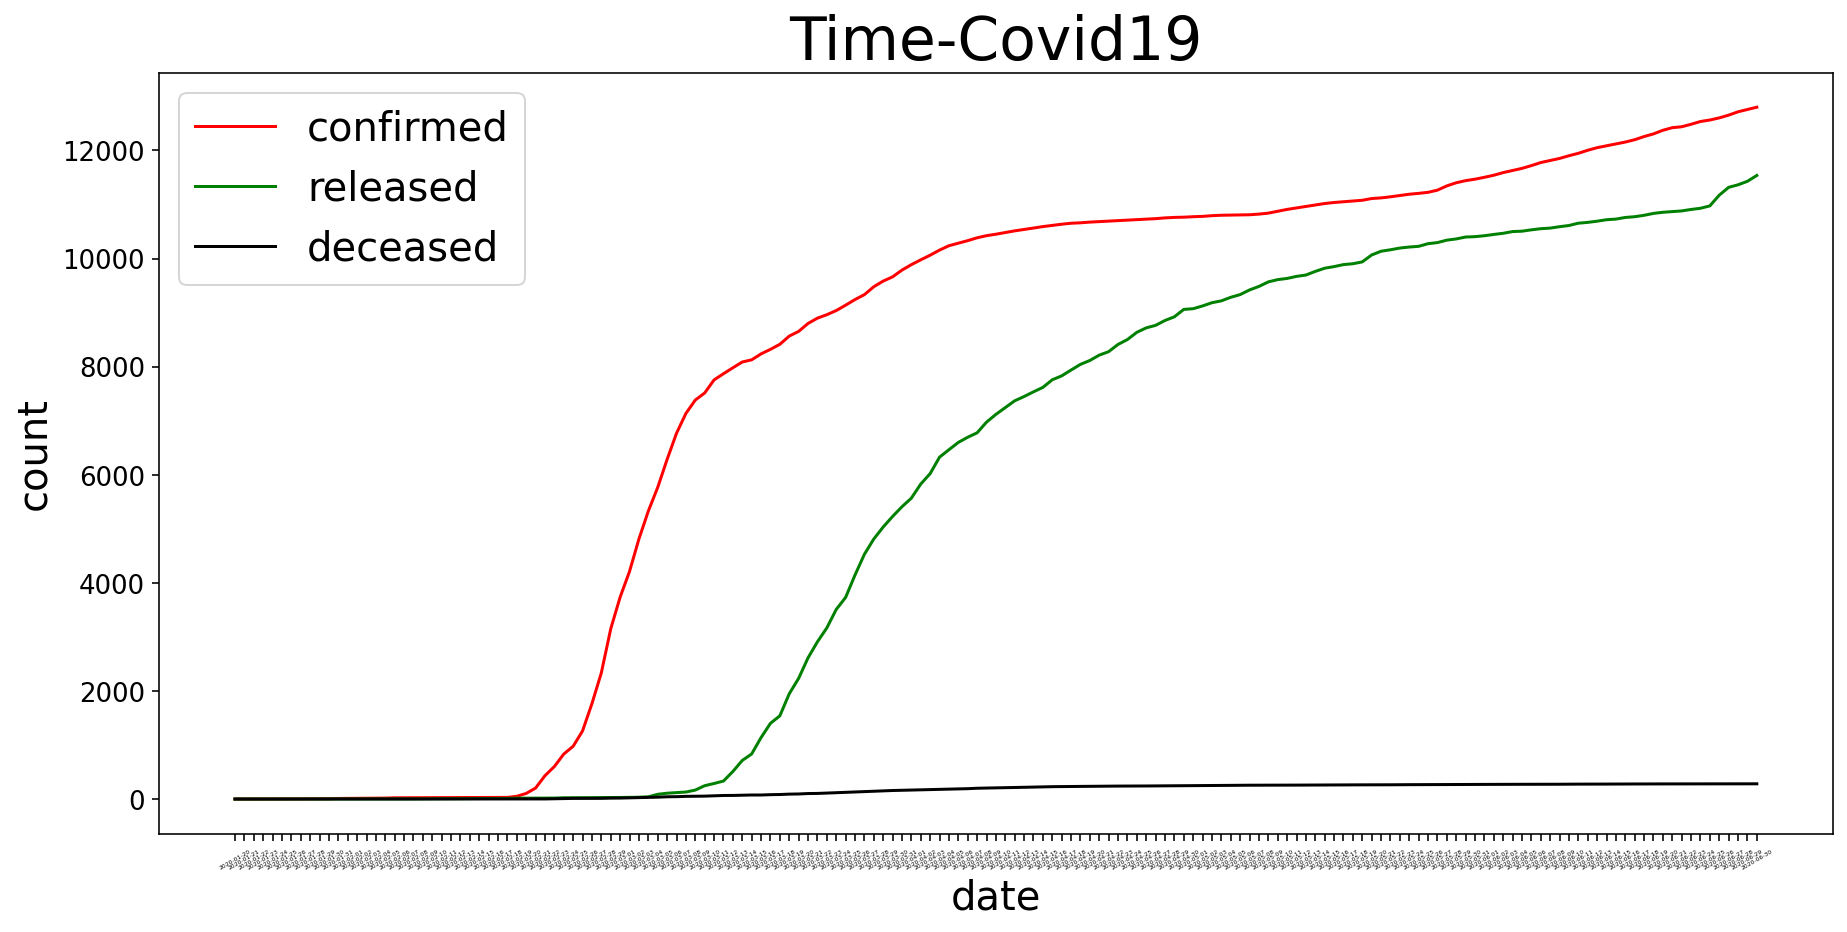

In [7]:
result02 = os.getenv('HOME')+'/codingmaster/corona19/result/result02.png'
Image(result02)

### 결과
> 2020년 1월 20일 부터 6월 30일 까지 전국 코로나 확진자(Red)와 사망자(Black) 누적 그래프이다. 전국 코로나 확진자는 2월 20일에 104명, 5일 후인 2월 25일 1261명으로 급증하였으며, 4월 3일까지 10062명으로 급증하는 추세가 이어졌다. 
>
>2월 20일에 첫 코로나 사망자가 발생했으며, 3월 21일 102명, 4월 8일에 200명, 6월 30일 기준 282명이다. 코로나 확진자가 급증하기 시작한 시기에 첫 사망자가 발생했으며, 지속적으로 꾸준히 증가하였다. 

### 1-2. 누적 확진자 및 누적 사망자 시각화(2020.06.30 기준)

In [ ]:
data01 = tp.loc[2754:2770]           # 광역시도별 누적 확진자, 사망자 별도 저장
data01

In [ ]:
data_dir = os.getenv('HOME')+'/codingmaster/corona19/map'

map_path = join(data_dir, 'province.json')   # jason 파일
map01 = gpd.read_file(map_path)                    # 데이터프레임으로 열기
map01

In [ ]:
# 지도 데이터 'CTP_ENG_NM' 와 광역시도별 확진자 및 사망자 데이터 'province' 동일하게 수정

map01.iloc[12, 1] = 'Jeollanam-do'     # 지정한 위치에 값 넣기Jeollanam-do
map01.iloc[12, 2] = '전라남도'
map01.iloc[9, 1] = 'Sejong'

map01

In [ ]:
import numpy as np
import pandas

js = map01.to_json()            # 수정한 데이터프레임을 다시 제이슨으로 저장
js

In [ ]:
folium.__version__    # 버전 확인

In [ ]:
from branca.colormap import linear

colormap = linear.Blues_09.scale(
    data01.confirmed.min(),              # confirmed 의 최소값
    data01.confirmed.max())              # confirmed 의 최대값

colormap

In [ ]:
confirmed_dict = data01.set_index('province')['confirmed']               # 딕셔너리로 지역별 확진자 수 색상으로 매칭
color_dict = {str(key): colormap(confirmed_dict[key]) for key in confirmed_dict.keys()}

In [ ]:
colormap = linear.Reds_09.scale(
    data01.deceased.min(),              # deceased 의 최소값
    data01.deceased.max())              # deceased 의 최대값

colormap

In [ ]:
deceased_dict = data01.set_index('province')['deceased']               # 딕셔너리로 지역별 사망자 수 색상으로 매칭
color_dict02 = {str(key): colormap(deceased_dict[key]) for key in deceased_dict.keys()}

In [ ]:
# 듀얼맵 생성
m = folium.plugins.DualMap(location=[37.541, 126.986], zoom_start=6.2)

folium.Choropleth(
    geo_data = js,            
    data = data01,
    columns = ['province','confirmed'],
    key_on='feature.properties.CTP_ENG_NM',
    fill_color = 'Blues',
    fill_opacity=0.6,
    line_opacity=0.4
).add_to(m.m1)                       # 첫번째 지도: 2020.06. 30 기준 광역시도별 누적 확진자 수 

folium.Choropleth(
    geo_data = js,            
    data = data01,
    columns = ['province','deceased'],
    key_on='feature.properties.CTP_ENG_NM',
    fill_color = 'Reds',
    fill_opacity=0.6,
    line_opacity=0.4
).add_to(m.m2)                        # 두번째 지도: 2020.06. 30 기준 광역시도별 누적 사망자 수


folium.TileLayer('CartoDBPositron').add_to(m)    # 사진 모두 적용

m

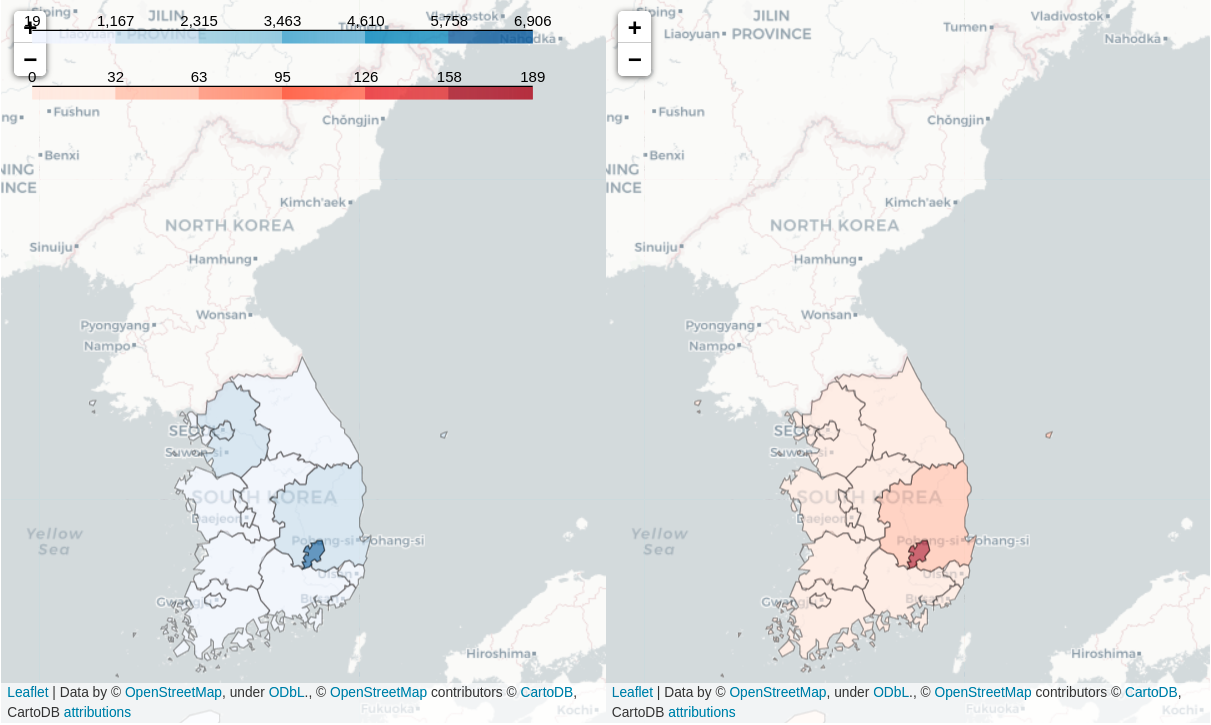

In [22]:
# pip install IPython
from IPython.display import Image

result01 = os.getenv('HOME')+'/codingmaster/corona19/result/result01.png'
Image(result01)

### 결과
> 2020년 6월 30일 기준, 전국 누적 확진자와 누적 사망자가 가장 많은 지역은 대구이다. 누적 확진자는 서울, 경기도, 경상북도, 대구 지역이 다른 지역에 비해 높은 누적율을 보이며, 누적 사망자는 경상북도와 대구 지역이 다른 지역에 비해 높은 누적율을 보인다. 

## [시각화 주제 2] 광역단위별 사망자 및 확진자 시각화

### 2-1. 광역단위별 누적 확진자 및 누적 사망자 시각화(2020.06.30 기준)

In [11]:
### timeprovince.csv 에는 지역별 누적 확진자 및 사망자가 있음

timeprovince = pd.read_csv('TimeProvince.csv')

timeprovince.head(5)

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

In [12]:
timeprovince.tail(5)

date  time          province  confirmed  released  deceased
2766  2020-06-30     0      Jeollabuk-do         27        21         0
2767  2020-06-30     0      Jeollanam-do         24        19         0
2768  2020-06-30     0  Gyeongsangbuk-do       1389      1328        54
2769  2020-06-30     0  Gyeongsangnam-do        134       128         0
2770  2020-06-30     0           Jeju-do         19        16         0

In [13]:
### 내가 필요한 자료는 확진자와 사망자이기 때문에 TimeProvince.csv에서 시도와 확진자 사망자만 볼 수 있게 편집

timeprovince_1 = timeprovince.loc[:, ['province', 'confirmed']]
timeprovince_2 = timeprovince.loc[:, ['province', 'deceased']]
# deceased = patientinfo.loc[:, ['province', 'deceased_date']]

In [14]:
### 누적 자료이기 때문에 제일 tail()을 이용해 하단부터  17개시도 timeprovince_confirmed 변수에 확진자 저장

timeprovince_confirmed = timeprovince_1.tail(17)

In [15]:
timeprovince_confirmed

province  confirmed
2754              Seoul       1312
2755              Busan        154
2756              Daegu       6906
2757            Incheon        341
2758            Gwangju         44
2759            Daejeon        117
2760              Ulsan         55
2761             Sejong         50
2762        Gyeonggi-do       1207
2763         Gangwon-do         65
2764  Chungcheongbuk-do         65
2765  Chungcheongnam-do        167
2766       Jeollabuk-do         27
2767       Jeollanam-do         24
2768   Gyeongsangbuk-do       1389
2769   Gyeongsangnam-do        134
2770            Jeju-do         19

In [16]:
### 위와 동일하게 timeprovince_deceased 변수에도 필요한 것만 저장

timeprovince_deceased = timeprovince_2.tail(17)

In [17]:
timeprovince_deceased

province  deceased
2754              Seoul         7
2755              Busan         3
2756              Daegu       189
2757            Incheon         1
2758            Gwangju         0
2759            Daejeon         1
2760              Ulsan         1
2761             Sejong         0
2762        Gyeonggi-do        23
2763         Gangwon-do         3
2764  Chungcheongbuk-do         0
2765  Chungcheongnam-do         0
2766       Jeollabuk-do         0
2767       Jeollanam-do         0
2768   Gyeongsangbuk-do        54
2769   Gyeongsangnam-do         0
2770            Jeju-do         0

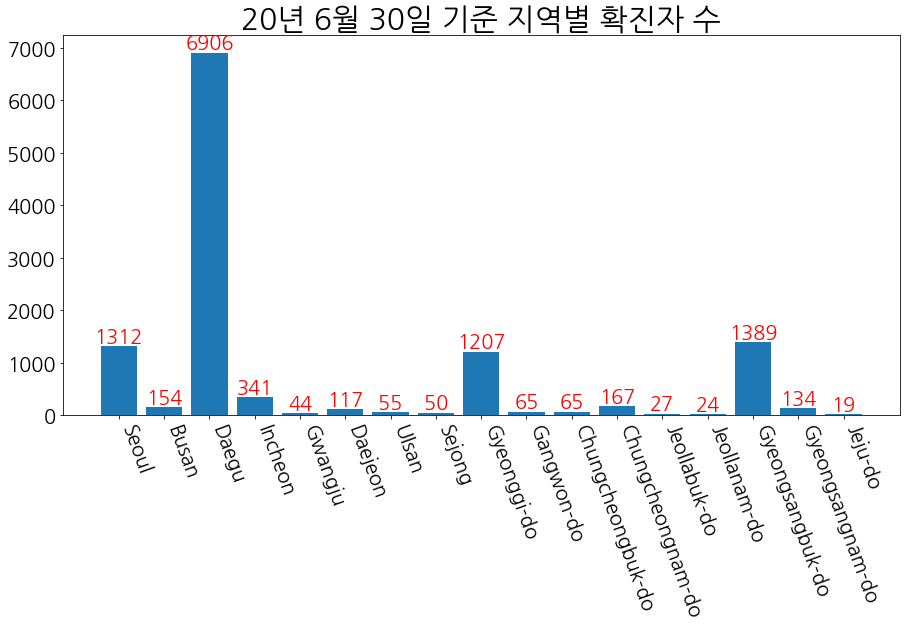

In [25]:
### 위에서 편집한 확진자 자료로 아래와 같은 그래프 생성

plt.figure(figsize=(15,7))
plt.rc('font', family="NanumGothic")

x = list(timeprovince_confirmed['province'])
y = list(timeprovince_confirmed['confirmed'])


# plt.axis('equal')
plt.bar(timeprovince_confirmed['province'], timeprovince_confirmed['confirmed'])


# https://www.delftstack.com/ko/howto/matplotlib/how-to-set-the-figure-title-and-axes-labels-font-size-in-matplotlib/
axes = plt.gca()
plt.title("20년 6월 30일 기준 지역별 확진자 수")
axes.title.set_size(30) 
plt.xticks(fontsize =20) 
plt.yticks(fontsize =20)


# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.xticks(rotation=-70, ha='left') 

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

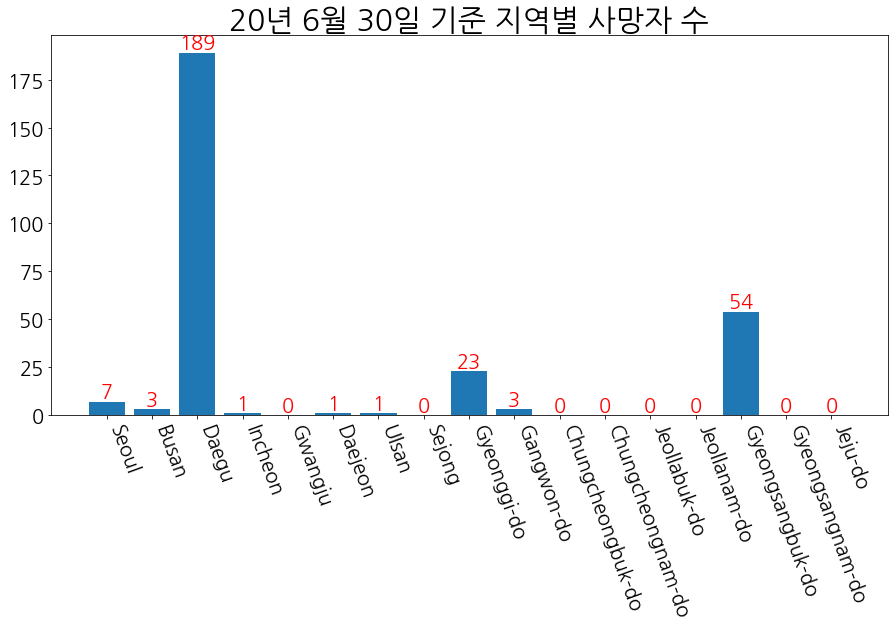

In [26]:
### 위와 같은 방식으로 사망자 그래프 생성

plt.figure(figsize=(15,7))
plt.rc('font', family="NanumGothic")

# plt.axis('equal')
plt.bar(timeprovince_deceased['province'], timeprovince_deceased['deceased'])

x = list(timeprovince_deceased['province'])
y = list(timeprovince_deceased['deceased'])

# https://www.delftstack.com/ko/howto/matplotlib/how-to-set-the-figure-title-and-axes-labels-font-size-in-matplotlib/
axes = plt.gca()
plt.title("20년 6월 30일 기준 지역별 사망자 수")
axes.title.set_size(30)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)


# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.xticks(rotation=-70, ha='left') 

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


plt.show()



### 2-2. 광역단위별 누적 확진자 및 누적 사망자 추세(2020.01.20 ~ 06.30 기준)

In [17]:
tp    # 일자-지역별 누적 확진자 및 사망자 정보

date  time          province  confirmed  released  deceased
0     2020-01-20    16             Seoul          0         0         0
1     2020-01-20    16             Busan          0         0         0
2     2020-01-20    16             Daegu          0         0         0
3     2020-01-20    16           Incheon          1         0         0
4     2020-01-20    16           Gwangju          0         0         0
...          ...   ...               ...        ...       ...       ...
2766  2020-06-30     0      Jeollabuk-do         27        21         0
2767  2020-06-30     0      Jeollanam-do         24        19         0
2768  2020-06-30     0  Gyeongsangbuk-do       1389      1328        54
2769  2020-06-30     0  Gyeongsangnam-do        134       128         0
2770  2020-06-30     0           Jeju-do         19        16         0

[2771 rows x 6 columns]

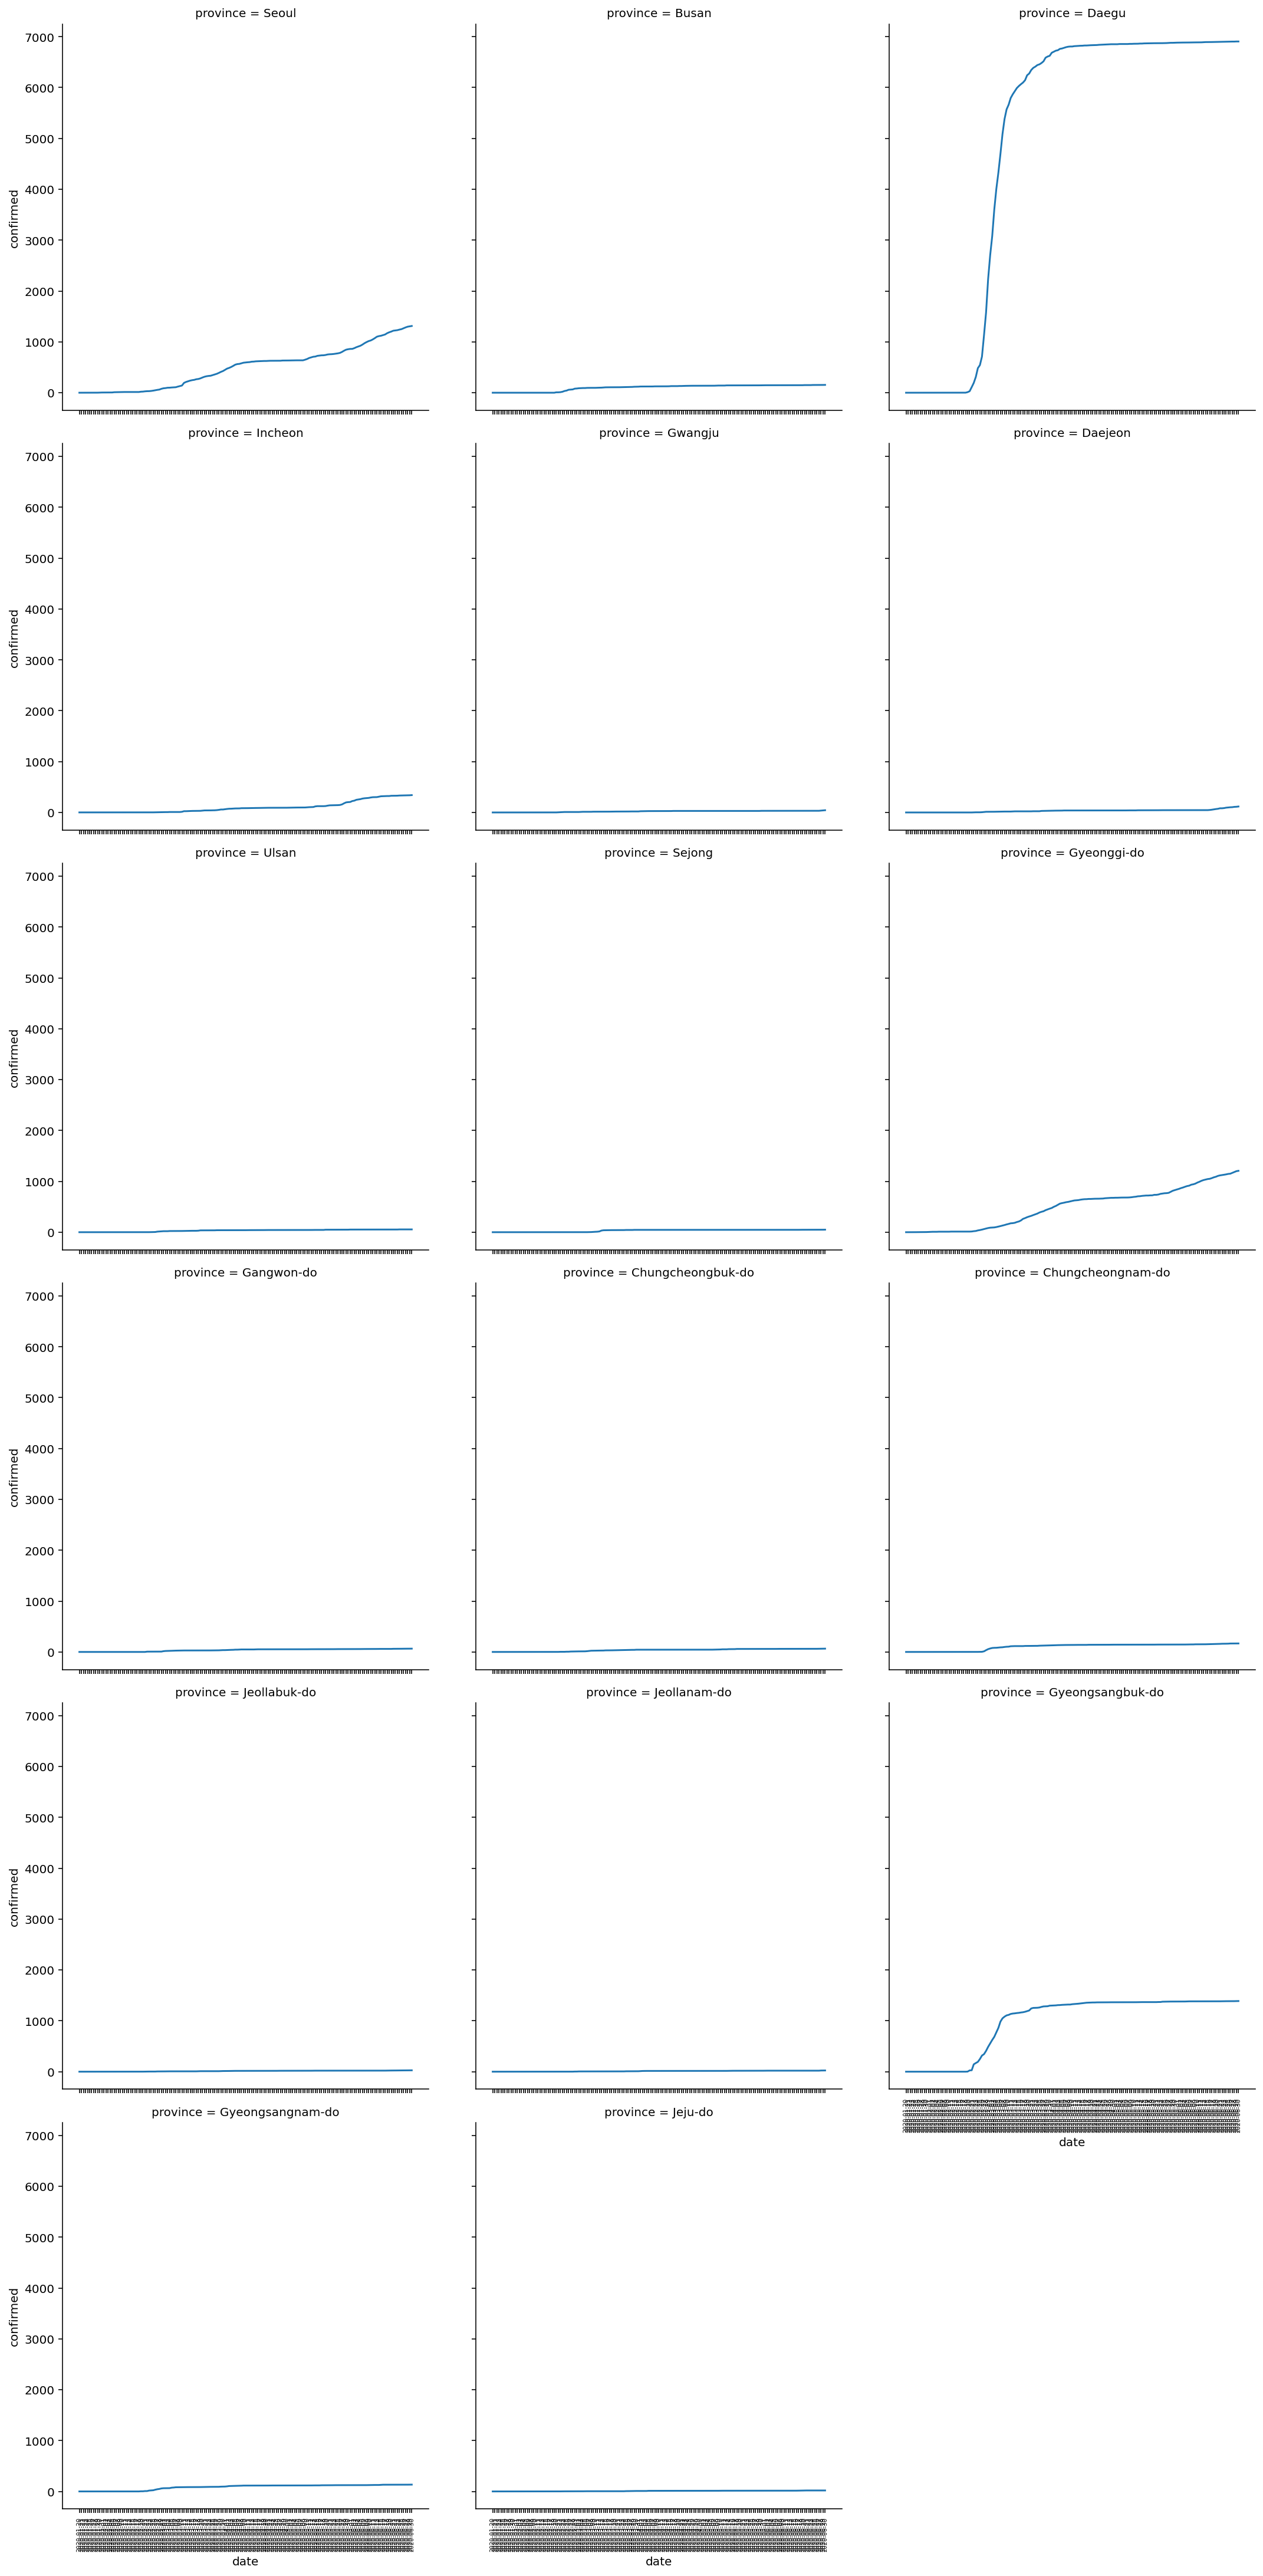

In [18]:
# 시도별로 날짜가 지남에 따른 확진자 수 추이 그래프 line그래프로 그려보기 
c_people = sns.relplot(data=tp, x='date', y='confirmed', kind='line', col='province', palette="rainbow", col_wrap=3, sizes=(17,5))
c_people.set_xticklabels(rotation=90, size=5) # figure 사이즈 조정하기..

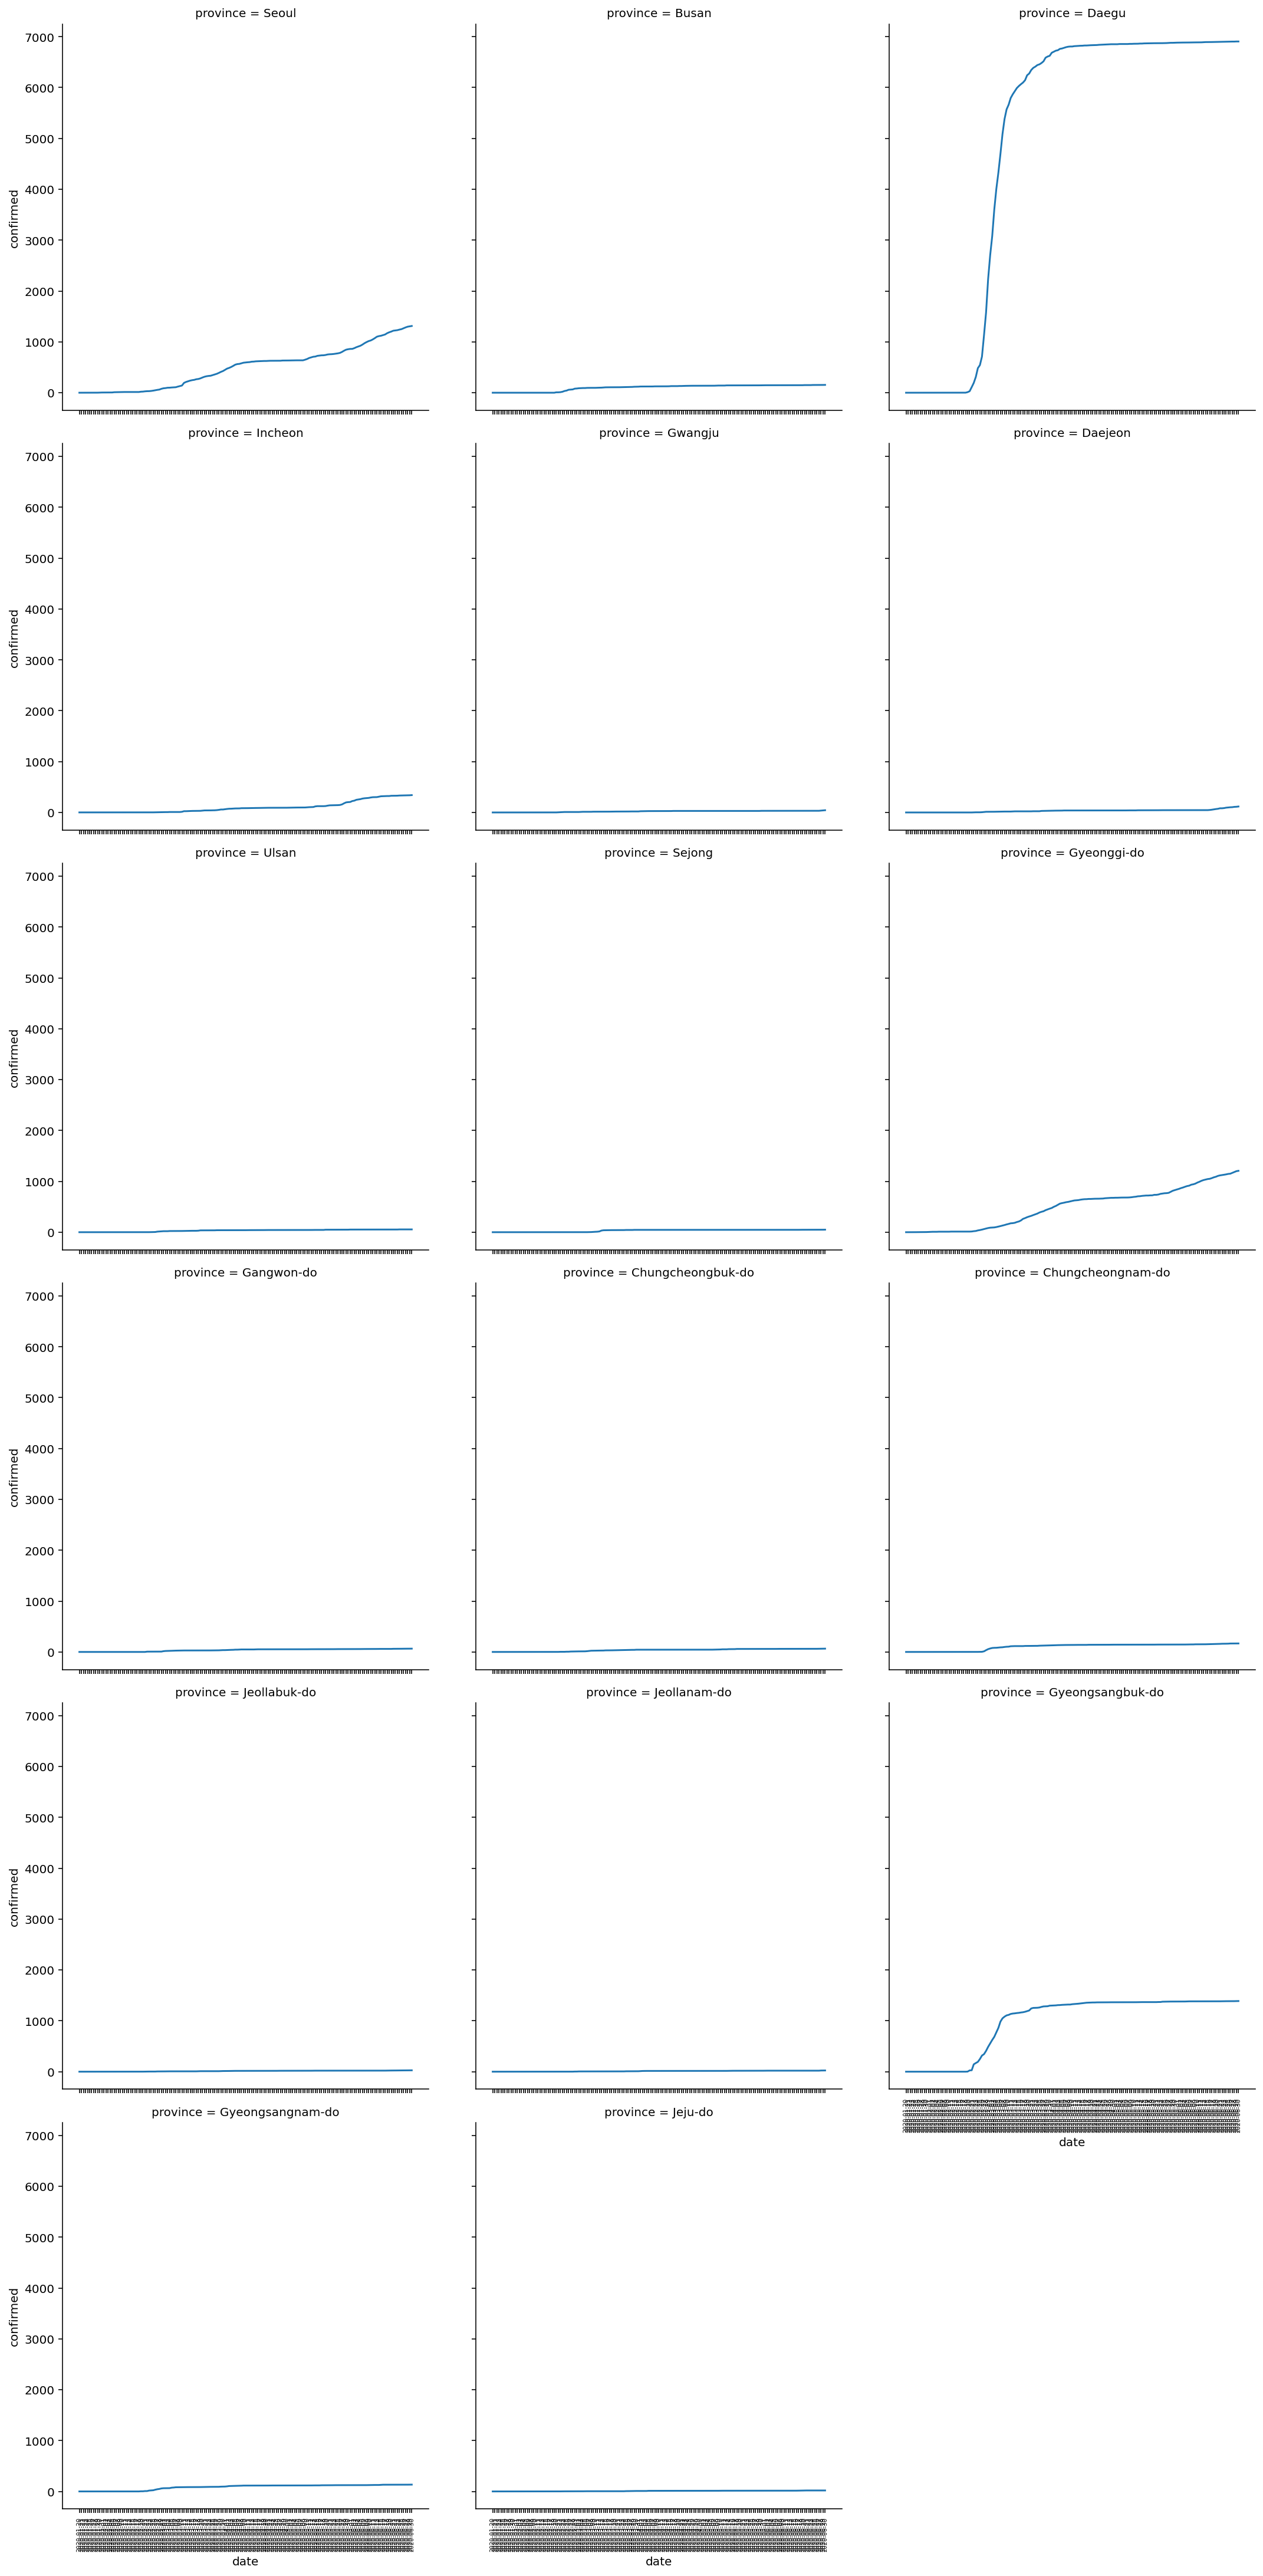

In [16]:
result03 = os.getenv('HOME')+'/codingmaster/corona19/result/result03.png'
Image(result03)

### 결과
> 2020년 1월 20일 부터 6월 30일 까지 광역시도별 코로나 확진자 추세 그래프이다. 대구에서 급격히 2월 중순부터 증가한 것을 확인할 수 있으며, 대구 이외에 서울과 경기도가 비슷한 시기에 확진자가 서서히 증가하는 패턴을 확인했다.
>
> 대구는 요양원, 종교시설에서 집단감염이 시작된 지역이며, 서울과 경기도는 인구 밀도가 높고 유동인구(국내외)가 많은 지역으로 확진자가 높다고 추측하였다. 

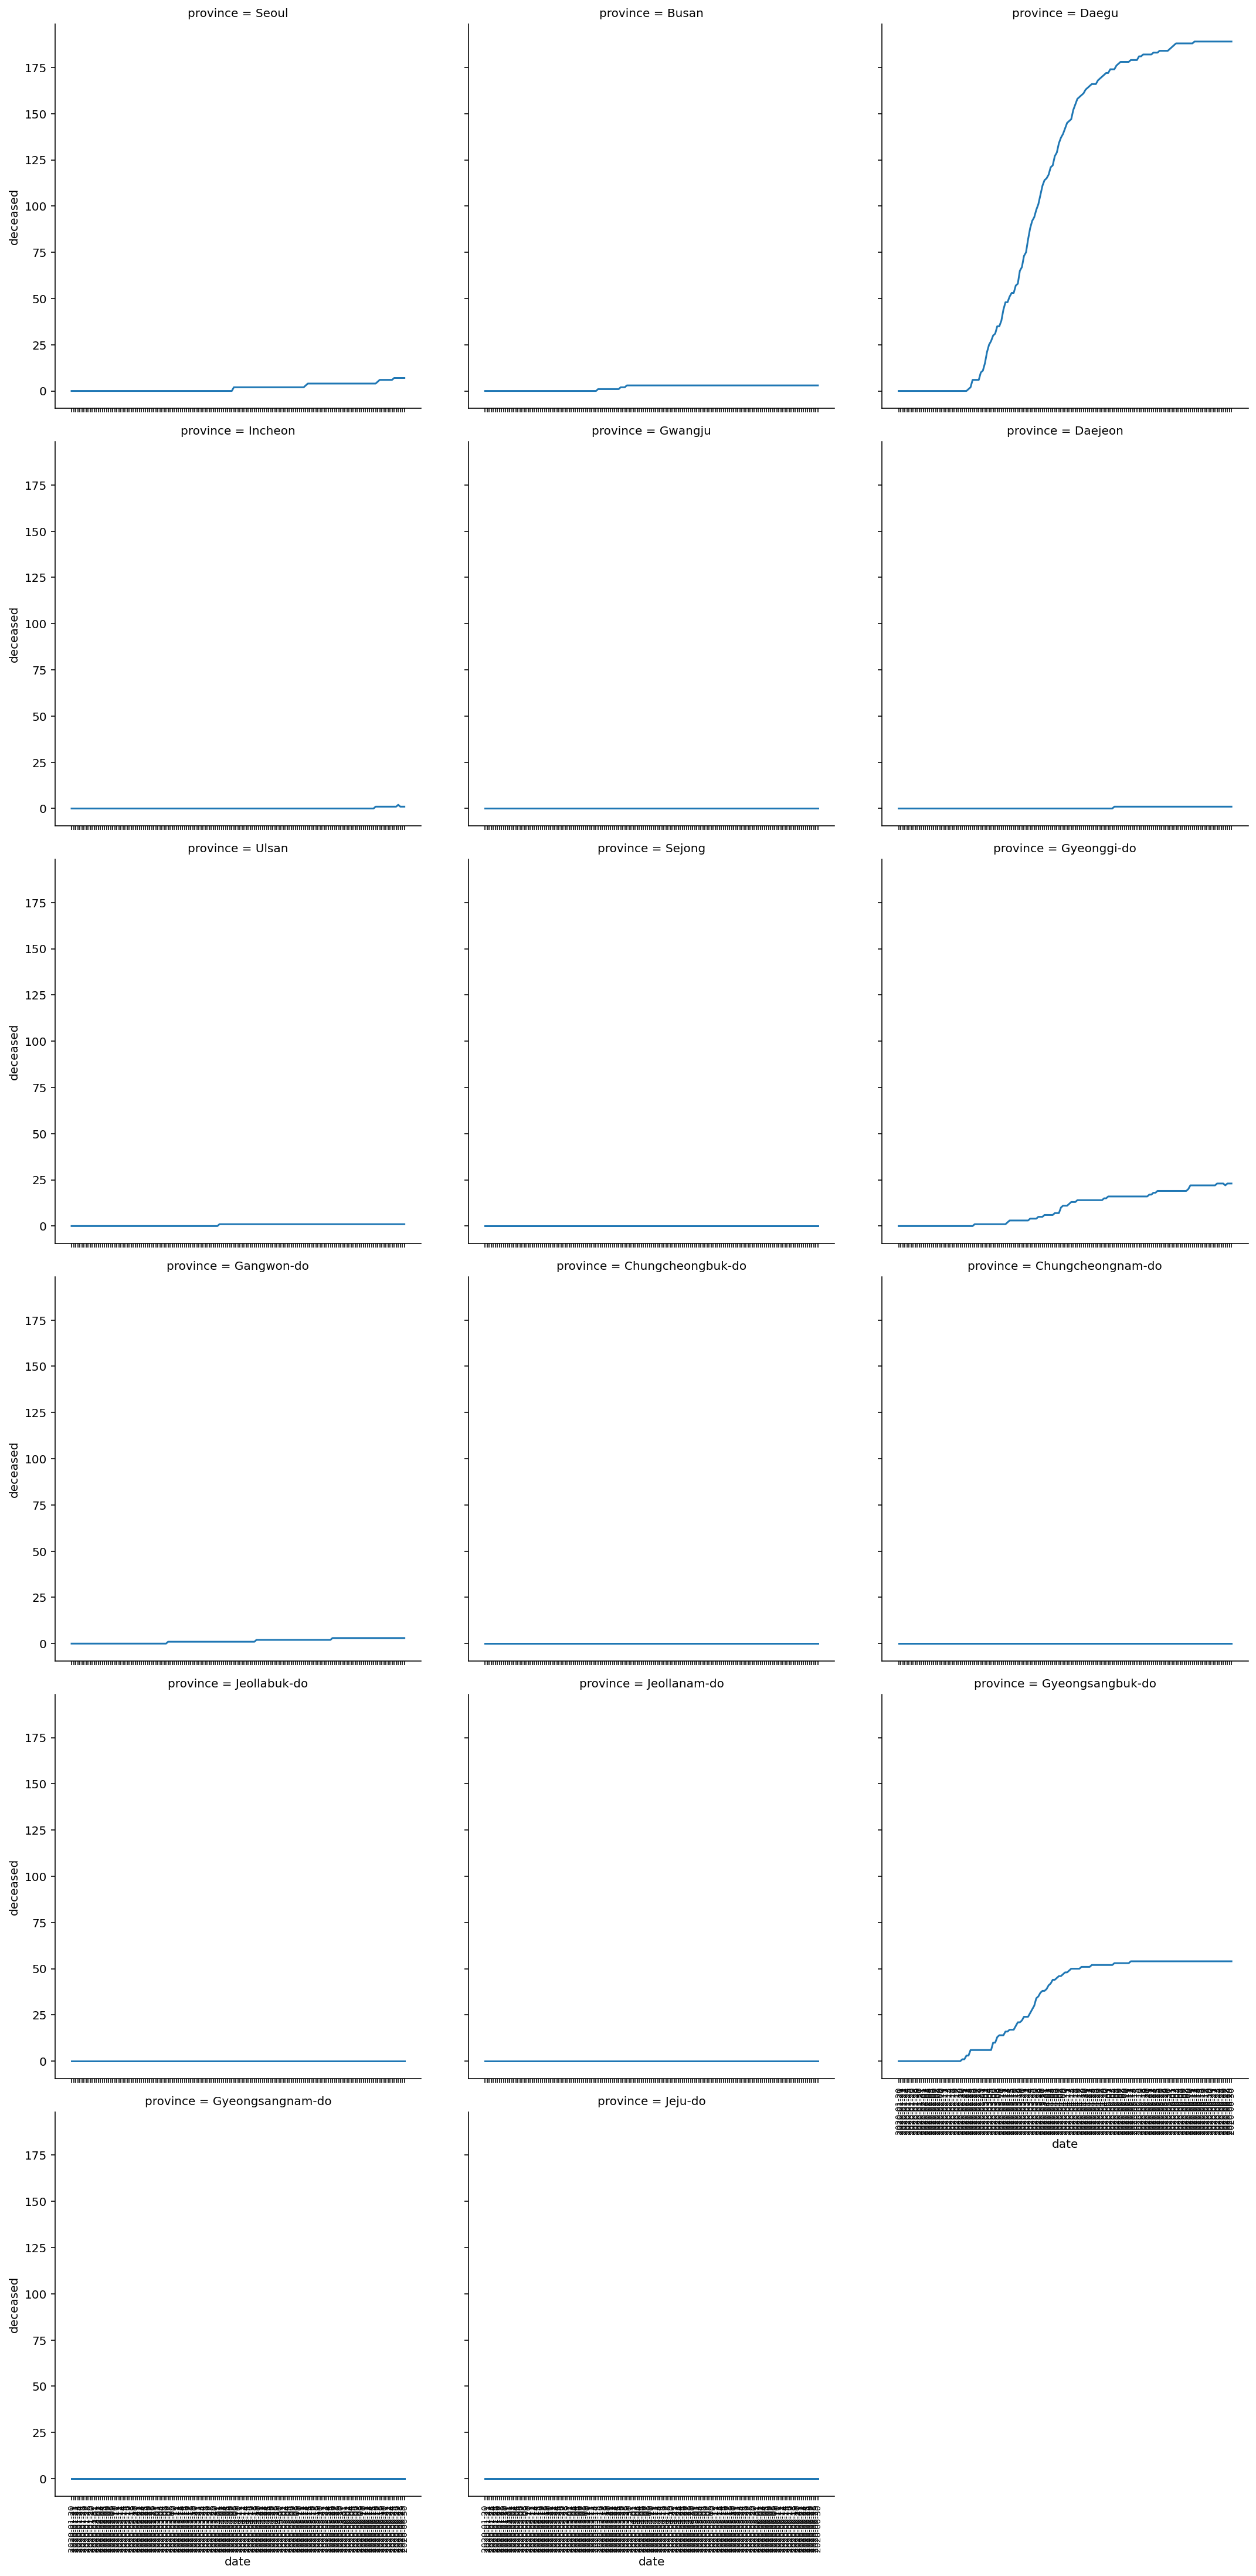

In [19]:
result04 = os.getenv('HOME')+'/codingmaster/corona19/result/result04.png'
Image(result04)# 시도별로 날짜가 지남에 따른 사망자 수 추이 그래프 line그래프로 그려보기 
d_people = sns.relplot(data=tp, x='date', y='deceased', kind='line', col='province', col_wrap=3, sizes=(17,5))
d_people.set_xticklabels(rotation=90, size=7) # figure 사이즈 조정하기..

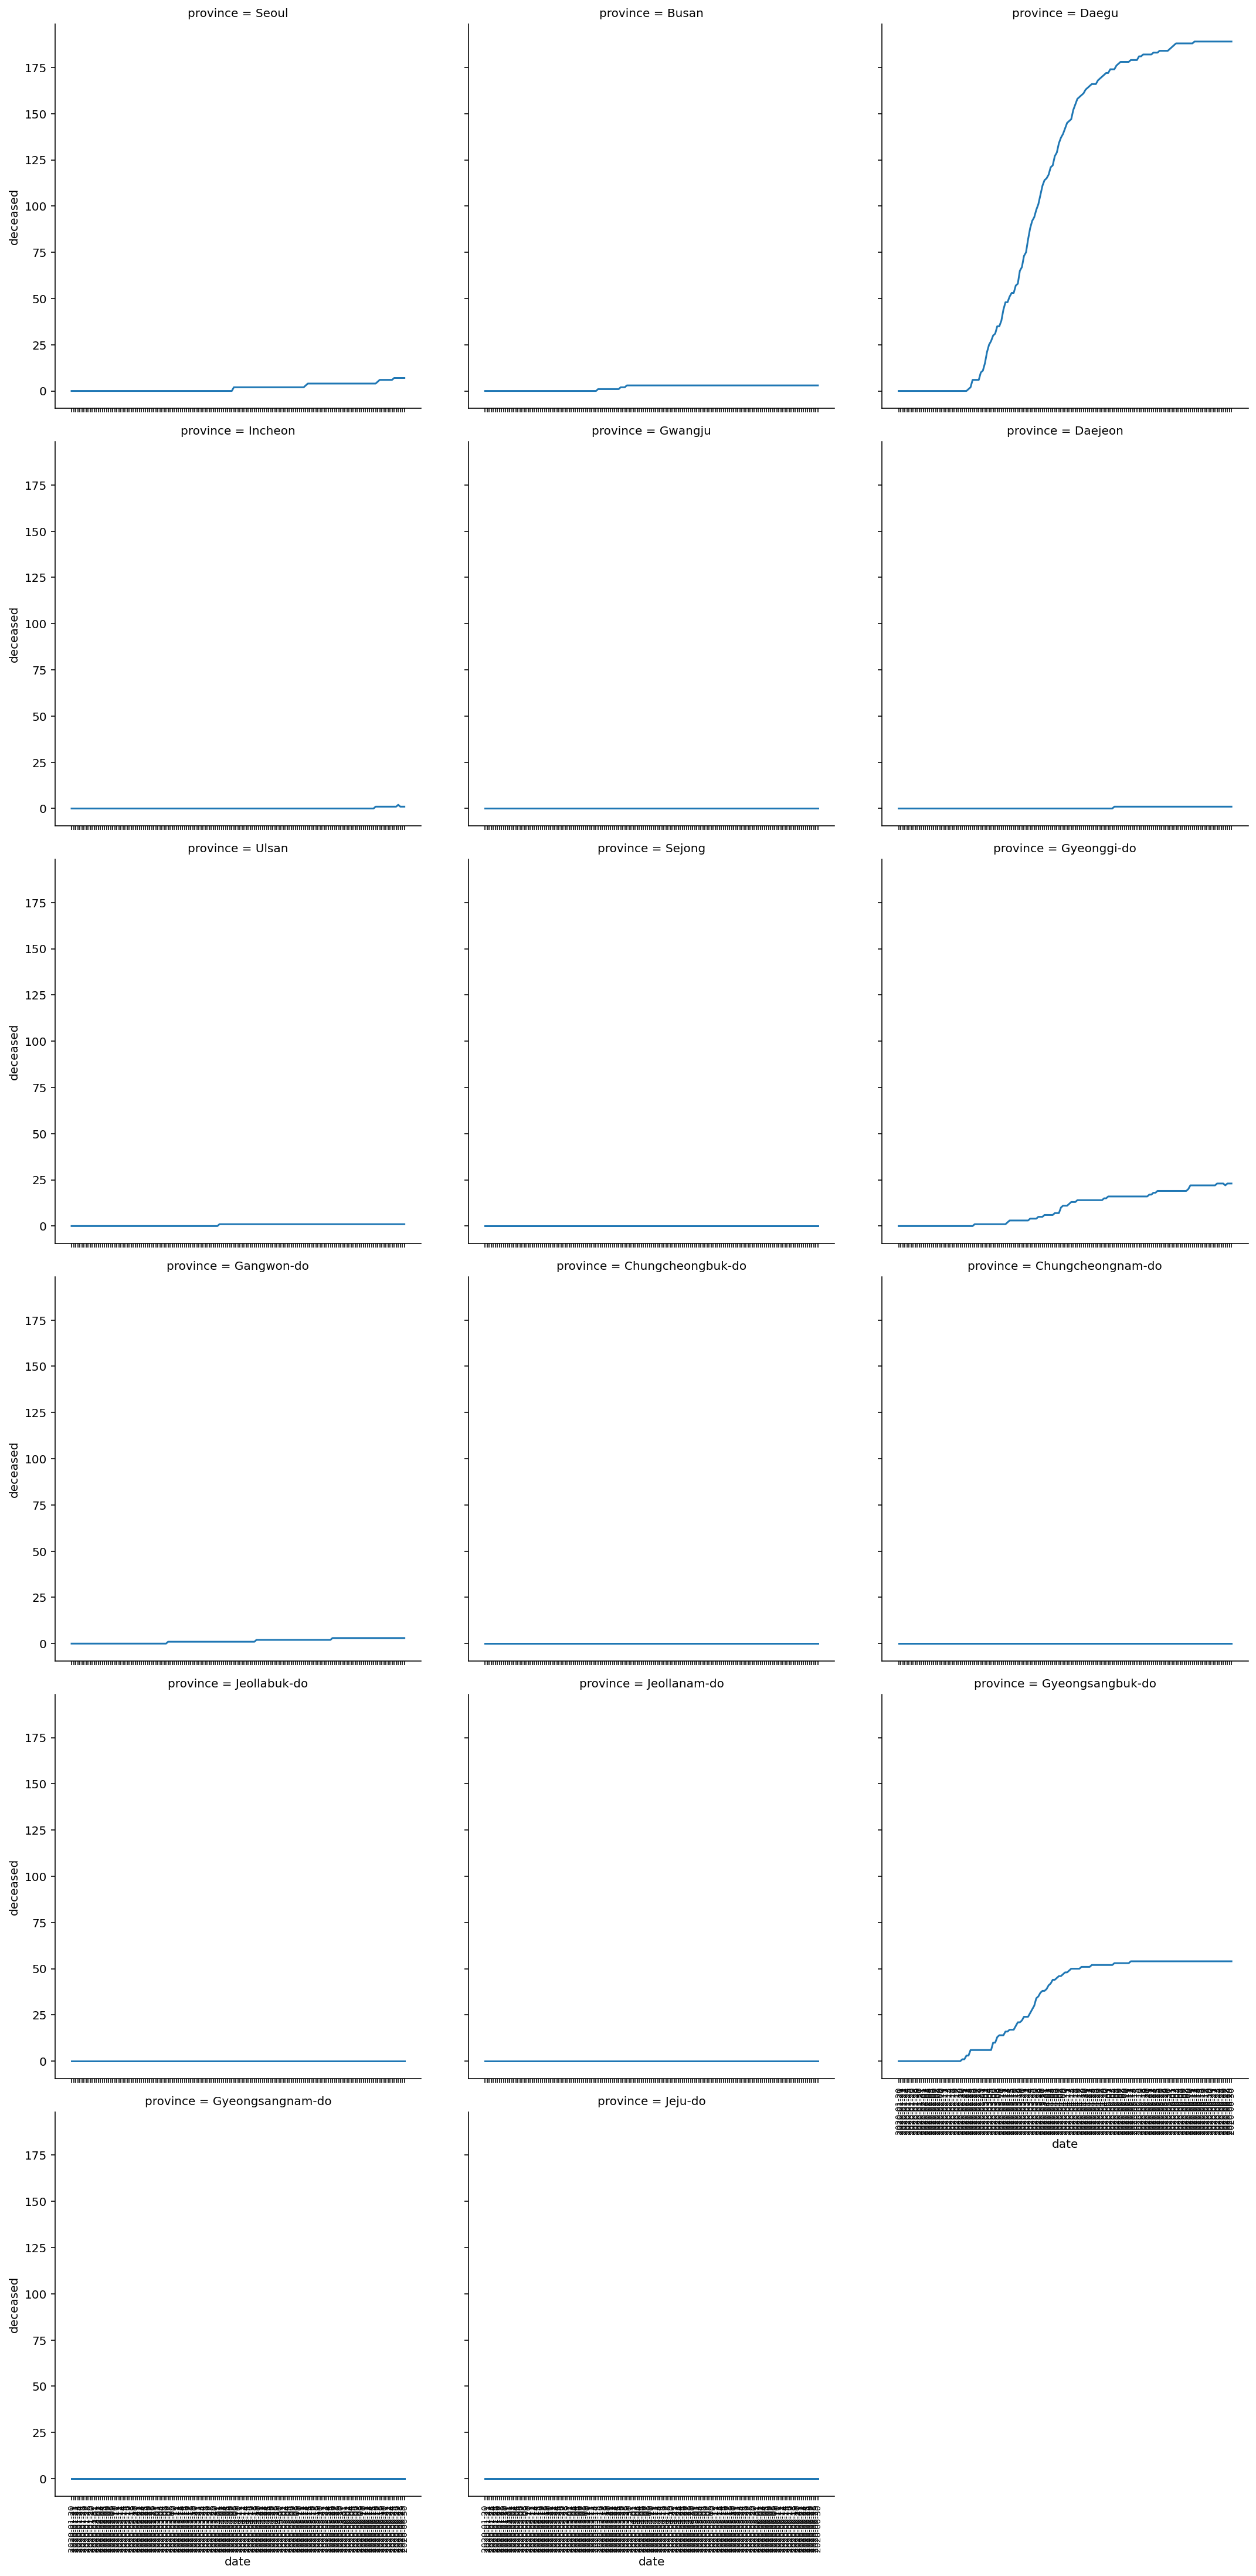

In [17]:
result04 = os.getenv('HOME')+'/codingmaster/corona19/result/result04.png'
Image(result04)

### 결과
> 2020년 1월 20일 부터 6월 30일 까지 광역시도별 코로나 사망자 추세 그래프이다. 대구에서 급격히 3월부터 증가한 것을 확인할 수 있으며, 대구 이외에 경기도, 서울, 부산이 비슷한 시기에가 서서히 증가하는 패턴을 확인했다. 
>
> 경기도와 서울은 확진자의 추세에서 비슷한 패턴을 확인했으나, 사망자 증가 추세에서는 경기도가 서울보다 사망자의 수가 많았다. 이는 경기도의 인구 비율이 서울 보다 질병에 취약한 노인인구가 높기 때문으로 추측된다. 

### 2-3. 광역단위별 누적 확진자 및 누적 사망자 시각화(2020.06.30 기준)

In [29]:
### 위도, 경도를 갖고 오기 위한 region 자료 불러오기
df = pd.read_csv('Region.csv', encoding='cp949')
df

code          province          city   latitude   longitude  \
0    10000             Seoul         Seoul  37.566953  126.977977   
1    10010             Seoul    Gangnam-gu  37.518421  127.047222   
2    10020             Seoul   Gangdong-gu  37.530492  127.123837   
3    10030             Seoul    Gangbuk-gu  37.639938  127.025508   
4    10040             Seoul    Gangseo-gu  37.551166  126.849506   
..     ...               ...           ...        ...         ...   
239  61160  Gyeongsangnam-do     Haman-gun  35.272481  128.406540   
240  61170  Gyeongsangnam-do   Hamyang-gun  35.520541  127.725177   
241  61180  Gyeongsangnam-do  Hapcheon-gun  35.566702  128.165870   
242  70000           Jeju-do       Jeju-do  33.488936  126.500423   
243  80000             Korea         Korea  37.566953  126.977977   

     elementary_school_count  kindergarten_count  university_count  \
0                        607                 830                48   
1                         33                  38                 0   
2                         27                  32                 0   
3                         14                  21                 0   
4                         36                  56                 1   
..                       ...                 ...               ...   
239                       16                  20                 0   
240                       13                  12                 0   
241                       17                  15                 0   
242                      113                 123                 4   
243                     6087                8837               340   

     academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0             1.44                     15.38                  5.8   
1             4.18                     13.17                  4.3   
2             1.54                     14.55                  5.4   
3             0.67                     19.49                  8.5   
4             1.17                     14.39                  5.7   
..             ...                       ...                  ...   
239           1.19                     23.74                 14.7   
240           1.01                     32.65                 20.9   
241           0.71                     38.44                 24.7   
242           1.53                     15.10                  6.4   
243           1.56                     15.67                  7.2   

     nursing_home_count  
0                 22739  
1                  3088  
2                  1023  
3                   628  
4                  1080  
..                  ...  
239                  94  
240                  83  
241                  96  
242                1245  
243               94865  

[244 rows x 12 columns]

In [30]:
### 위에 timeprovince_confirmed에는 확진자가 시도별로 나눠져있기 때문에 city의 구까지 자료는 필요가 없음
### 그러므로 province 칼럼에 unique()를 통해 겹치지 않는 내용만 출력

a = df['province'].unique()
print(a)

['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do' 'Korea']


In [31]:
### 원래는 반복문을 통해 province와 city가 동일한 값을 갖는 것만 출력하고 싶었지만 실패...
### 그래서 인터넷을 찾아보니 블로그에서 isin([])를 사용하면 입력한 해당 값만 불러올 수 있다고 해서 그냥 입력해서 함

df_province = df[df['city'].isin(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon', 'Ulsan', 'Sejong',
                    'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
                    'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'])]

In [54]:
### 원하던대로 province와 city가 일치하는 자료만 출력 가능

df_province

code           province               city   latitude   longitude  \
0    10000              Seoul              Seoul  37.566953  126.977977   
26   11000              Busan              Busan  35.179884  129.074796   
43   12000              Daegu              Daegu  35.872150  128.601783   
52   13000            Gwangju            Gwangju  35.160467  126.851392   
58   14000            Incheon            Incheon  37.456188  126.705920   
69   15000            Daejeon            Daejeon  36.350621  127.384744   
75   16000              Ulsan              Ulsan  35.539797  129.311538   
81   17000             Sejong             Sejong  36.480132  127.289021   
82   20000        Gyeonggi-do        Gyeonggi-do  37.275119  127.009466   
114  30000         Gangwon-do         Gangwon-do  37.885369  127.729868   
133  40000  Chungcheongbuk-do  Chungcheongbuk-do  36.635680  127.491384   
145  41000  Chungcheongnam-do  Chungcheongnam-do  36.658976  126.673318   
161  50000       Jeollabuk-do       Jeollabuk-do  35.820308  127.108791   
176  51000       Jeollanam-do       Jeollanam-do  34.816095  126.463021   
199  60000   Gyeongsangbuk-do   Gyeongsangbuk-do  36.576032  128.505599   
223  61000   Gyeongsangnam-do   Gyeongsangnam-do  35.238294  128.692397   
242  70000            Jeju-do            Jeju-do  33.488936  126.500423   

     elementary_school_count  kindergarten_count  university_count  \
0                        607                 830                48   
26                       304                 408                22   
43                       229                 355                11   
52                       155                 312                17   
58                       250                 403                 7   
69                       148                 260                15   
75                       119                 200                 4   
81                        48                  60                 3   
82                      1277                2237                61   
114                      349                 368                18   
133                      259                 328                17   
145                      409                 499                21   
161                      419                 519                19   
176                      429                 542                19   
199                      471                 707                33   
223                      501                 686                21   
242                      113                 123                 4   

     academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0             1.44                     15.38                  5.8   
26            1.40                     18.41                  8.6   
43            1.62                     15.78                  7.5   
52            2.38                     13.57                  6.4   
58            1.27                     13.20                  5.8   
69            1.49                     13.65                  5.8   
75            2.21                     11.76                  5.2   
81            1.78                      9.48                  3.8   
82            1.60                     12.63                  5.2   
114           1.42                     19.89                  9.8   
133           1.39                     17.28                  8.5   
145           1.38                     18.40                  8.9   
161           2.12                     20.60                 10.9   
176           1.45                     22.81                 13.5   
199           1.33                     20.85                 11.1   
223           1.78                     16.51                  9.1   
242           1.53                     15.10                  6.4   

     nursing_home_count  
0                 22739  
26                 6752  
43                 5083  
52                 2852  
58                 44

In [33]:
timeprovince_confirmed

province  confirmed
2754              Seoul       1312
2755              Busan        154
2756              Daegu       6906
2757            Incheon        341
2758            Gwangju         44
2759            Daejeon        117
2760              Ulsan         55
2761             Sejong         50
2762        Gyeonggi-do       1207
2763         Gangwon-do         65
2764  Chungcheongbuk-do         65
2765  Chungcheongnam-do        167
2766       Jeollabuk-do         27
2767       Jeollanam-do         24
2768   Gyeongsangbuk-do       1389
2769   Gyeongsangnam-do        134
2770            Jeju-do         19

In [34]:
### merge를 사용하면 같은 칼럼이 있는 것을 기준으로 합칠 수 있다고 인터넷에서 확인
### 그래서 df_province(지역별 위도,경도 자료)와 timprrovince_confirmed(확진자 자료)를 합침

merge_province_confirmed = pd.merge(df_province, timeprovince_confirmed, on='province')
merge_province_confirmed.head(20)

code           province               city   latitude   longitude  \
0   10000              Seoul              Seoul  37.566953  126.977977   
1   11000              Busan              Busan  35.179884  129.074796   
2   12000              Daegu              Daegu  35.872150  128.601783   
3   13000            Gwangju            Gwangju  35.160467  126.851392   
4   14000            Incheon            Incheon  37.456188  126.705920   
5   15000            Daejeon            Daejeon  36.350621  127.384744   
6   16000              Ulsan              Ulsan  35.539797  129.311538   
7   17000             Sejong             Sejong  36.480132  127.289021   
8   20000        Gyeonggi-do        Gyeonggi-do  37.275119  127.009466   
9   30000         Gangwon-do         Gangwon-do  37.885369  127.729868   
10  40000  Chungcheongbuk-do  Chungcheongbuk-do  36.635680  127.491384   
11  41000  Chungcheongnam-do  Chungcheongnam-do  36.658976  126.673318   
12  50000       Jeollabuk-do       Jeollabuk-do  35.820308  127.108791   
13  51000       Jeollanam-do       Jeollanam-do  34.816095  126.463021   
14  60000   Gyeongsangbuk-do   Gyeongsangbuk-do  36.576032  128.505599   
15  61000   Gyeongsangnam-do   Gyeongsangnam-do  35.238294  128.692397   
16  70000            Jeju-do            Jeju-do  33.488936  126.500423   

    elementary_school_count  kindergarten_count  university_count  \
0                       607                 830                48   
1                       304                 408                22   
2                       229                 355                11   
3                       155                 312                17   
4                       250                 403                 7   
5                       148                 260                15   
6                       119                 200                 4   
7                        48                  60                 3   
8                      1277                2237                61   
9                       349                 368                18   
10                      259                 328                17   
11                      409                 499                21   
12                      419                 519                19   
13                      429                 542                19   
14                      471                 707                33   
15                      501                 686                21   
16                      113                 123                 4   

    academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0            1.44                     15.38                  5.8   
1            1.40                     18.41                  8.6   
2            1.62                     15.78                  7.5   
3            2.38                     13.57                  6.4   
4            1.27                     13.20                  5.8   
5            1.49                     13.65                  5.8   
6            2.21                     11.76                  5.2   
7            1.78                      9.48                  3.8   
8            1.60                     12.63                  5.2   
9            1.42                     19.89                  9.8   
10           1.39                     17.28                  8.5   
11           1.38                     18.40                  8.9   
12           2.12                     20.60                 10.9   
13           1.45                     22.81                 13.5   
14           1.33                     20.85                 11.1   
15           1.78                     16.51                  9.1   
16           1.53                     15.10                  6.4   

    nursing_home_count  confirmed  
0                22739       1312  
1                 6752        154  
2                 5083       6906  
3                 2852         44  
4                 4497  

In [35]:
### 내가 필요한 칼럼은 지역명, 위도, 경도, 확진자만 필요하므로 필요없는 데이터 제거

merge_province_confirmed1 = merge_province_confirmed.loc[:, ['province', 'latitude', 'longitude', 'confirmed']]
merge_province_confirmed1.head(20)

province   latitude   longitude  confirmed
0               Seoul  37.566953  126.977977       1312
1               Busan  35.179884  129.074796        154
2               Daegu  35.872150  128.601783       6906
3             Gwangju  35.160467  126.851392         44
4             Incheon  37.456188  126.705920        341
5             Daejeon  36.350621  127.384744        117
6               Ulsan  35.539797  129.311538         55
7              Sejong  36.480132  127.289021         50
8         Gyeonggi-do  37.275119  127.009466       1207
9          Gangwon-do  37.885369  127.729868         65
10  Chungcheongbuk-do  36.635680  127.491384         65
11  Chungcheongnam-do  36.658976  126.673318        167
12       Jeollabuk-do  35.820308  127.108791         27
13       Jeollanam-do  34.816095  126.463021         24
14   Gyeongsangbuk-do  36.576032  128.505599       1389
15   Gyeongsangnam-do  35.238294  128.692397        134
16            Jeju-do  33.488936  126.500423         19

In [ ]:
map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in merge_province_confirmed1.index:
    folium.Marker(location = [merge_province_confirmed1.loc[a,"latitude"],merge_province_confirmed1.loc[a,"longitude"]],
                  popup=merge_province_confirmed1.loc[a,"confirmed"]).add_to(marker_cluster)
    list1.append(merge_province_confirmed1.loc[a,"latitude"])
    list2.append(merge_province_confirmed1.loc[a,"longitude"])

map.save('confirmed.html')

In [9]:
from IPython.display import IFrame

IFrame(src='./confirmed.html', width=700, height=600)

In [37]:
### 위와 같은 방법으로 사망자도 표현

merge_province_deceased = pd.merge(df_province, timeprovince_deceased, on='province')
merge_province_deceased.head(20)

code           province               city   latitude   longitude  \
0   10000              Seoul              Seoul  37.566953  126.977977   
1   11000              Busan              Busan  35.179884  129.074796   
2   12000              Daegu              Daegu  35.872150  128.601783   
3   13000            Gwangju            Gwangju  35.160467  126.851392   
4   14000            Incheon            Incheon  37.456188  126.705920   
5   15000            Daejeon            Daejeon  36.350621  127.384744   
6   16000              Ulsan              Ulsan  35.539797  129.311538   
7   17000             Sejong             Sejong  36.480132  127.289021   
8   20000        Gyeonggi-do        Gyeonggi-do  37.275119  127.009466   
9   30000         Gangwon-do         Gangwon-do  37.885369  127.729868   
10  40000  Chungcheongbuk-do  Chungcheongbuk-do  36.635680  127.491384   
11  41000  Chungcheongnam-do  Chungcheongnam-do  36.658976  126.673318   
12  50000       Jeollabuk-do       Jeollabuk-do  35.820308  127.108791   
13  51000       Jeollanam-do       Jeollanam-do  34.816095  126.463021   
14  60000   Gyeongsangbuk-do   Gyeongsangbuk-do  36.576032  128.505599   
15  61000   Gyeongsangnam-do   Gyeongsangnam-do  35.238294  128.692397   
16  70000            Jeju-do            Jeju-do  33.488936  126.500423   

    elementary_school_count  kindergarten_count  university_count  \
0                       607                 830                48   
1                       304                 408                22   
2                       229                 355                11   
3                       155                 312                17   
4                       250                 403                 7   
5                       148                 260                15   
6                       119                 200                 4   
7                        48                  60                 3   
8                      1277                2237                61   
9                       349                 368                18   
10                      259                 328                17   
11                      409                 499                21   
12                      419                 519                19   
13                      429                 542                19   
14                      471                 707                33   
15                      501                 686                21   
16                      113                 123                 4   

    academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0            1.44                     15.38                  5.8   
1            1.40                     18.41                  8.6   
2            1.62                     15.78                  7.5   
3            2.38                     13.57                  6.4   
4            1.27                     13.20                  5.8   
5            1.49                     13.65                  5.8   
6            2.21                     11.76                  5.2   
7            1.78                      9.48                  3.8   
8            1.60                     12.63                  5.2   
9            1.42                     19.89                  9.8   
10           1.39                     17.28                  8.5   
11           1.38                     18.40                  8.9   
12           2.12                     20.60                 10.9   
13           1.45                     22.81                 13.5   
14           1.33                     20.85                 11.1   
15           1.78                     16.51                  9.1   
16           1.53                     15.10                  6.4   

    nursing_home_count  deceased  
0                22739         7  
1                 6752         3  
2                 5083       189  
3                 2852         0  
4                 4497       

In [38]:
merge_province_deceased1 = merge_province_deceased.loc[:, ['province', 'latitude', 'longitude', 'deceased']]

merge_province_deceased1.head(20)

province   latitude   longitude  deceased
0               Seoul  37.566953  126.977977         7
1               Busan  35.179884  129.074796         3
2               Daegu  35.872150  128.601783       189
3             Gwangju  35.160467  126.851392         0
4             Incheon  37.456188  126.705920         1
5             Daejeon  36.350621  127.384744         1
6               Ulsan  35.539797  129.311538         1
7              Sejong  36.480132  127.289021         0
8         Gyeonggi-do  37.275119  127.009466        23
9          Gangwon-do  37.885369  127.729868         3
10  Chungcheongbuk-do  36.635680  127.491384         0
11  Chungcheongnam-do  36.658976  126.673318         0
12       Jeollabuk-do  35.820308  127.108791         0
13       Jeollanam-do  34.816095  126.463021         0
14   Gyeongsangbuk-do  36.576032  128.505599        54
15   Gyeongsangnam-do  35.238294  128.692397         0
16            Jeju-do  33.488936  126.500423         0

In [59]:
map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in merge_province_confirmed1.index:
    folium.Marker(location = [merge_province_deceased1.loc[a,"latitude"],merge_province_deceased1.loc[a,"longitude"]],
                  popup=merge_province_deceased1.loc[a,"deceased"]).add_to(marker_cluster)
    list1.append(merge_province_deceased1.loc[a,"latitude"])
    list2.append(merge_province_deceased1.loc[a,"longitude"])

map.save('deceased.html')

In [2]:
IFrame(src='./deceased.html', width=700, height=600)

### 2-4. 광역단위별 누적 확진자 및 누적 사망자 성비 시각화(2020.06.30 기준)

In [ ]:
m = 0
f = 0
for row in patient['sex']:
    if row == 'male':
        m += 1
    else:
        f += 1
print('male:', m)
print('female:', f)

size = [m, f]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt. pie(size, labels = ['M', 'F'], autopct = '%.1f%%', colors = ['crimson', 'darkcyan'], wedgeprops = wedgeprops, startangle = 90)
plt.title('Gender Ratio of Confirmed Case')
plt.show()

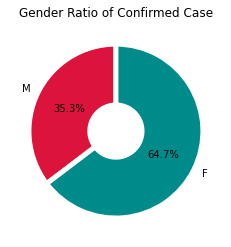


### 남성 35.3% 여성 64.7%로 여성 확진자가 우세한 모습을 보인다

In [2]:
def gender_ratio(province): ## 행정구역별 확진자 성비 추출 함수
    province_list = patient['province'].unique()
    province_m = dict.fromkeys(province_list+'.m',0)
    province_f = dict.fromkeys(province_list+'.f',0)
    for i in range(len(patient['sex'])):
        if patient['sex'][i] == 'male' and patient['province'][i] == province:
            province_m[province + '.m'] += 1
        if patient['sex'][i] == 'female' and patient['province'][i] == province:
            province_f[province + '.f'] += 1
    return province_m[province+ '.m'], province_f[province + '.f']

In [ ]:
for province in patient_province:

    plt. pie(gender_ratio(province), labels = ['M', 'F'], autopct = '%.1f%%', colors = ['crimson', 'darkcyan'], wedgeprops = wedgeprops, startangle = 90)
    plt.title(province)
    plt.show()

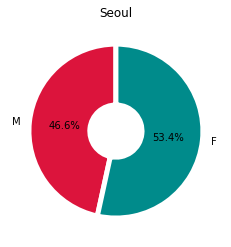

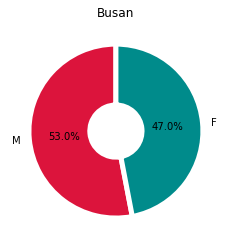

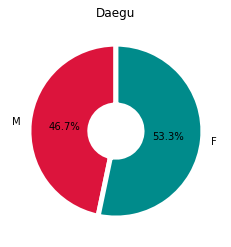

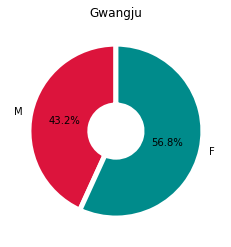

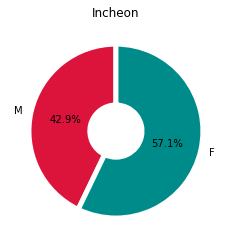

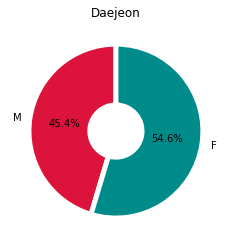

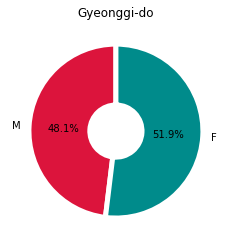

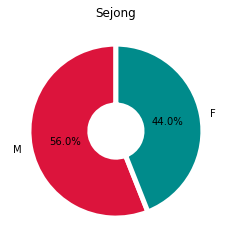

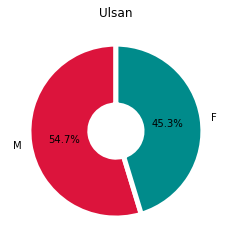

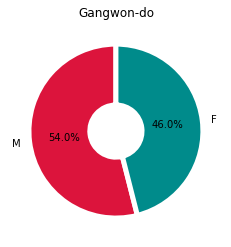

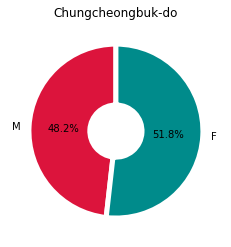

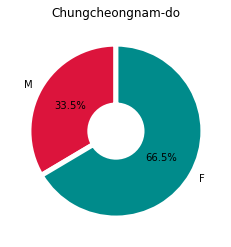

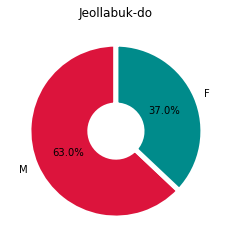

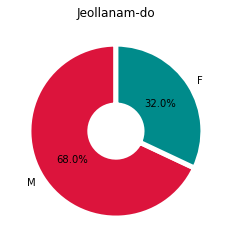

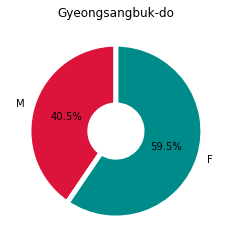

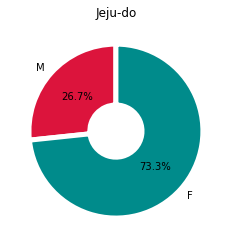

## [시각화 주제 3] 광역단위별 사망자 및 확진자 상관관계 분석(지역 특성, 날씨)

### 3-1. 광역단위별 누적 사망자 및  확진자와 지역 특성 간의 상관관계 분석

In [20]:
newdata01   # 'region' + 'data01' : 광역단위별 지역정보와 누적자 및 확진자 

province  confirmed  released  deceased  elementary_school_count  \
0               Seoul       1312       985         7                      607   
1               Busan        154       142         3                      304   
2               Daegu       6906      6700       189                      229   
3             Incheon        341       290         1                      250   
4             Gwangju         44        32         0                      155   
5             Daejeon        117        44         1                      148   
6               Ulsan         55        50         1                      119   
7              Sejong         50        47         0                       48   
8         Gyeonggi-do       1207       931        23                     1277   
9          Gangwon-do         65        54         3                      349   
10  Chungcheongbuk-do         65        60         0                      259   
11  Chungcheongnam-do        167       150         0                      409   
12       Jeollabuk-do         27        21         0                      419   
13       Jeollanam-do         24        19         0                      429   
14   Gyeongsangbuk-do       1389      1328        54                      471   
15   Gyeongsangnam-do        134       128         0                      501   
16            Jeju-do         19        16         0                      113   

    kindergarten_count  university_count  academy_ratio  \
0                  830                48           1.44   
1                  408                22           1.40   
2                  355                11           1.62   
3                  403                 7           1.27   
4                  312                17           2.38   
5                  260                15           1.49   
6                  200                 4           2.21   
7                   60                 3           1.78   
8                 2237                61           1.60   
9                  368                18           1.42   
10                 328                17           1.39   
11                 499                21           1.38   
12                 519                19           2.12   
13                 542                19           1.45   
14                 707                33           1.33   
15                 686                21           1.78   
16                 123                 4           1.53   

    elderly_population_ratio  elderly_alone_ratio  nursing_home_count  
0                      15.38                  5.8               22739  
1                      18.41                  8.6                6752  
2                      15.78                  7.5                5083  
3                      13.20                  5.8                4497  
4                      13.57                  6.4                2852  
5                      13.65                  5.8                2984  
6                      11.76                  5.2                1801  
7                       9.48                  3.8                 491  
8                      12.63                  5.2               20491  
9                      19.89                  9.8                2519  
10                     17.28                  8.5                2769  
11                     18.40                  8.9                3641  
12                     20.60                 10.9                3774  
13                     22.81                 13.5                3389  
14                     20.85                 11.1                4474  
15                     16.51                  9.1                5364  
16                     15.10                  6.4                1245

In [21]:
result = newdata01.corr()
result

confirmed  released  deceased  \
confirmed                  1.000000  0.998598  0.982883   
released                   0.998598  1.000000  0.988981   
deceased                   0.982883  0.988981  1.000000   
elementary_school_count    0.080984  0.044108  0.018174   
kindergarten_count         0.111802  0.074430  0.052778   
university_count           0.086281  0.043153  0.009324   
academy_ratio             -0.095200 -0.085778 -0.079430   
elderly_population_ratio  -0.025350 -0.012399  0.034498   
elderly_alone_ratio       -0.050971 -0.031702  0.028390   
nursing_home_count         0.201593  0.151694  0.063832   

                          elementary_school_count  kindergarten_count  \
confirmed                                0.080984            0.111802   
released                                 0.044108            0.074430   
deceased                                 0.018174            0.052778   
elementary_school_count                  1.000000            0.981118   
kindergarten_count                       0.981118            1.000000   
university_count                         0.915748            0.893019   
academy_ratio                           -0.193474           -0.128199   
elderly_population_ratio                 0.153570            0.006884   
elderly_alone_ratio                      0.115468           -0.017767   
nursing_home_count                       0.794112            0.786111   

                          university_count  academy_ratio  \
confirmed                         0.086281      -0.095200   
released                          0.043153      -0.085778   
deceased                          0.009324      -0.079430   
elementary_school_count           0.915748      -0.193474   
kindergarten_count                0.893019      -0.128199   
university_count                  1.000000      -0.214392   
academy_ratio                    -0.214392       1.000000   
elderly_population_ratio          0.160519      -0.326156   
elderly_alone_ratio               0.070178      -0.214889   
nursing_home_count                0.885809      -0.188696   

                          elderly_population_ratio  elderly_alone_ratio  \
confirmed                                -0.025350            -0.050971   
released                                 -0.012399            -0.031702   
deceased                                  0.034498             0.028390   
elementary_school_count                   0.153570             0.115468   
kindergarten_count                        0.006884            -0.017767   
university_count                          0.160519             0.070178   
academy_ratio                            -0.326156            -0.214889   
elderly_population_ratio                  1.000000             0.967433   
elderly_alone_ratio                       0.967433             1.000000   
nursing_home_count                       -0.104574            -0.220500   

                          nursing_home_count  
confirmed                           0.201593  
released                            0.151694  
deceased                            0.063832  
elementary_school_count             0.794112  
kindergarten_count                  0.786111  
university_count                    0.885809  
academy_ratio                      -0.188696  
elderly_population_ratio           -0.104574  
elderly_alone_ratio                -0.220500  
nursing_home_count                  1.000000

In [ ]:
sns.clustermap(result, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [23]:
result05 = os.getenv('HOME')+'/codingmaster/corona19/result/result05.png'
Image(result05)

* sns.clustermap() 을 활용하면, sns.heatmap 을 사용한 것과 동일하게 색상으로 나타내주고, 거기에 더해서 행과 열별로 비슷한 항목들을 묶어준다(clustering).

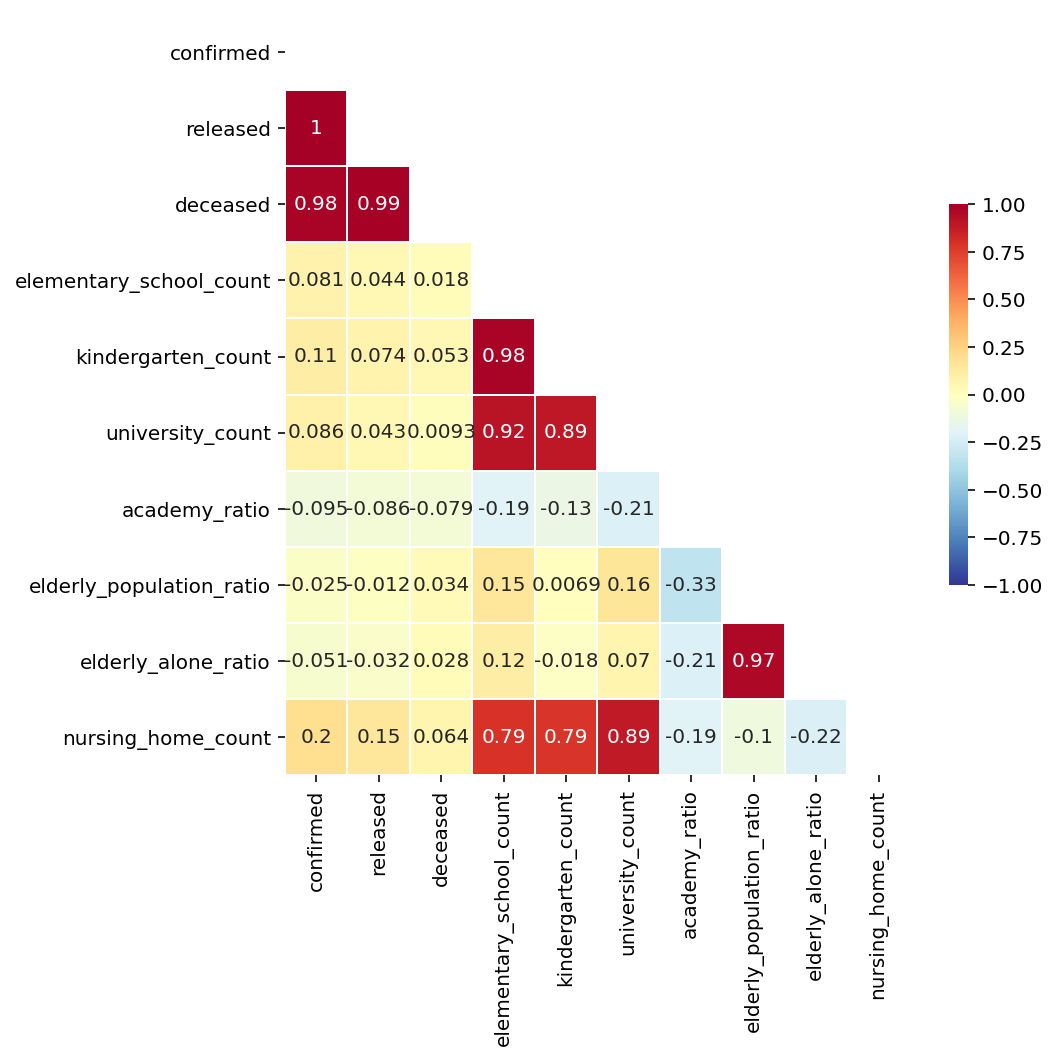

In [24]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(result, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(result, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


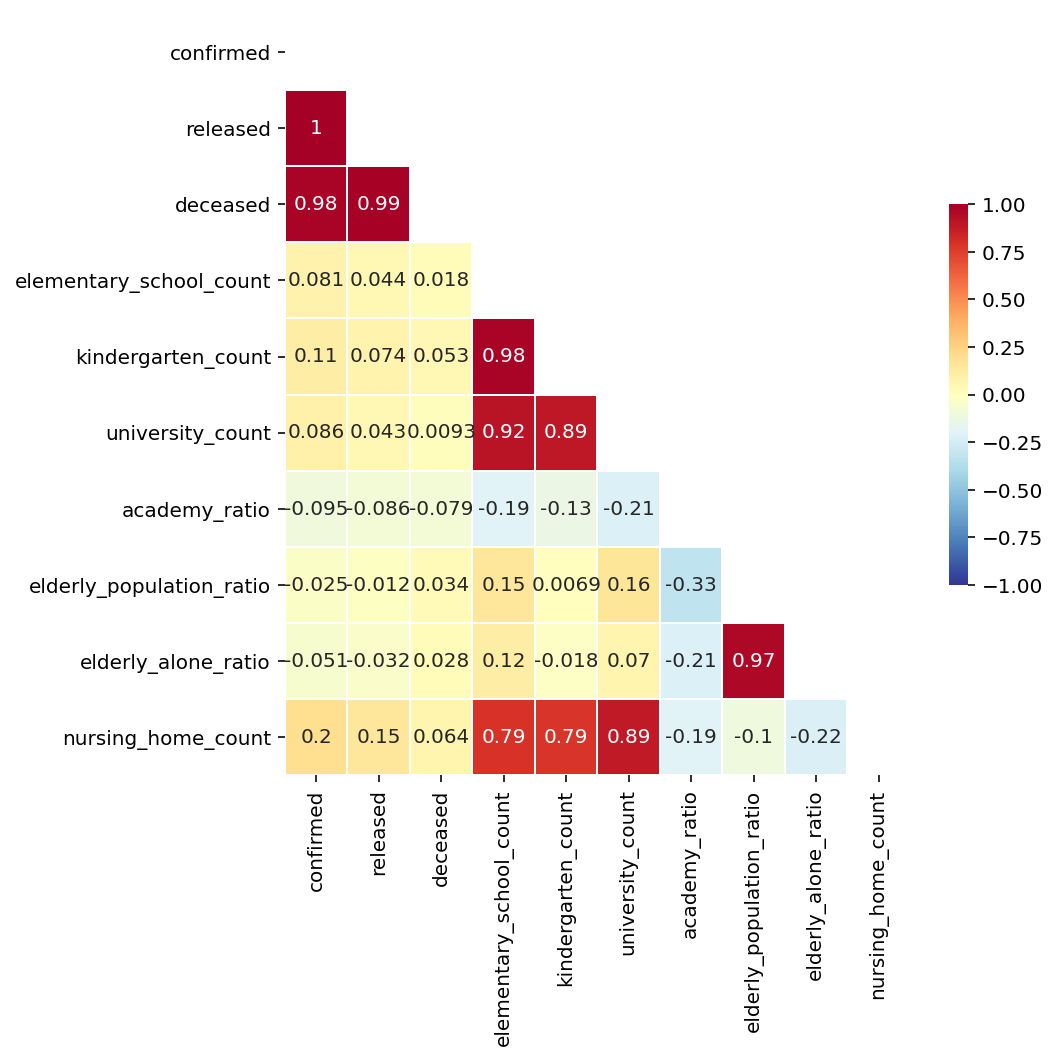

In [24]:
result06 = os.getenv('HOME')+'/codingmaster/corona19/result/result06.png'
Image(result06)

## 결과

> 2020년 6월 30일 기준 총 코로나 확진자와 사망자, 지역 특성(초등학교 수, 유치원 수, 대학 수, 노인 인구 비율, 요양원 수 등) 사이의 상관관계를 확인하였다. 확진자와 사망자 모두 지역 특성 중 상관관계가 높은 것은 없었다.
>
> 세부적으로 살펴보면 코로나 지역별 확진자의 수는 유치원, 요양원이 많은 지역과 비교적 상관관계가 있음이 확인되었으며, 지역별 사망자의 수도 요양원, 고등교육기관의 비율이 높은 지역이 비교적 상관관계가 있음을 확인하였다. 
>
> 2020년 기사를 검색한 결과, 2월 20일 청도 대남병원을 시작으로 요양원에서 다수의 코로나 확진자가 발생한 것을 확인하였다. 

### 3-2. 지역별 특성 시각화: 유치원 수, 요양원 수, 고등교육기관 비율 

In [41]:
# 위에서 만들어 놓은 merge_province_confiremd에서 
# academy_ratio, nursing_home_count, kindergarten_count만 갖고오기

merge_province_etc = merge_province_confirmed.loc[:, ['province', 'latitude', 'longitude', 
                                                             'academy_ratio', 'nursing_home_count', 'kindergarten_count']]
merge_province_etc.head(20)

province   latitude   longitude  academy_ratio  \
0               Seoul  37.566953  126.977977           1.44   
1               Busan  35.179884  129.074796           1.40   
2               Daegu  35.872150  128.601783           1.62   
3             Gwangju  35.160467  126.851392           2.38   
4             Incheon  37.456188  126.705920           1.27   
5             Daejeon  36.350621  127.384744           1.49   
6               Ulsan  35.539797  129.311538           2.21   
7              Sejong  36.480132  127.289021           1.78   
8         Gyeonggi-do  37.275119  127.009466           1.60   
9          Gangwon-do  37.885369  127.729868           1.42   
10  Chungcheongbuk-do  36.635680  127.491384           1.39   
11  Chungcheongnam-do  36.658976  126.673318           1.38   
12       Jeollabuk-do  35.820308  127.108791           2.12   
13       Jeollanam-do  34.816095  126.463021           1.45   
14   Gyeongsangbuk-do  36.576032  128.505599           1.33   
15   Gyeongsangnam-do  35.238294  128.692397           1.78   
16            Jeju-do  33.488936  126.500423           1.53   

    nursing_home_count  kindergarten_count  
0                22739                 830  
1                 6752                 408  
2                 5083                 355  
3                 2852                 312  
4                 4497                 403  
5                 2984                 260  
6                 1801                 200  
7                  491                  60  
8                20491                2237  
9                 2519                 368  
10                2769                 328  
11                3641                 499  
12                3774                 519  
13                3389                 542  
14                4474                 707  
15                5364                 686  
16                1245                 123

In [66]:
# 유치원 시각화

map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in merge_province_etc.index:
    folium.Marker(location = [merge_province_etc.loc[a,"latitude"],merge_province_etc.loc[a,"longitude"]],
                  popup=merge_province_etc.loc[a,"kindergarten_count"]).add_to(marker_cluster)
    list1.append(merge_province_etc.loc[a,"latitude"])
    list2.append(merge_province_etc.loc[a,"longitude"])

map.save('kindergarten.html')

In [3]:
IFrame(src='./kindergarten.html', width=700, height=600)

In [65]:
# 요양원 시각화

map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in merge_province_etc.index:
    folium.Marker(location = [merge_province_etc.loc[a,"latitude"],merge_province_etc.loc[a,"longitude"]],
                  popup=merge_province_etc.loc[a,"nursing_home_count"]).add_to(marker_cluster)
    list1.append(merge_province_etc.loc[a,"latitude"])
    list2.append(merge_province_etc.loc[a,"longitude"])

map.save('nursing_home.html')

In [4]:
IFrame(src='./nursing_home.html', width=700, height=600)

In [72]:
# 고등교육기관 비율 시각화

map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in merge_province_etc.index:
    folium.Marker(location = [merge_province_etc.loc[a,"latitude"],merge_province_etc.loc[a,"longitude"]],
                  popup=merge_province_etc.loc[a,"academy_ratio"]).add_to(marker_cluster)
    list1.append(merge_province_etc.loc[a,"latitude"])
    list2.append(merge_province_etc.loc[a,"longitude"])

map.save('academy.html')

In [5]:
IFrame(src='./academy.html', width=700, height=600)

### 3-2. 광역단위별 누적 사망자 및  확진자와 기온 간의 상관관계 분석

In [ ]:
df_weather = weather[['date', 'avg_temp']]
df_weather = df_weather.groupby('date', as_index = False).mean()
df_weather 


In [ ]:
df_patient = pd.DataFrame(patient['confirmed_date'].dropna())
df_patient['confirmed'] = int(1)
df_patient = pd.DataFrame(df_patient.groupby('confirmed_date', as_index = False).sum())
df_patient.columns = ['date', 'confirmed']
df_patient

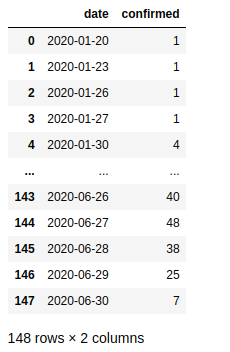

In [ ]:
time_weather = pd.merge(df_weather, df_patient, on = 'date')
time_weather

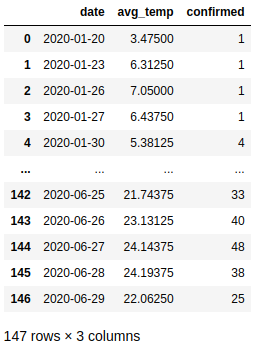

In [ ]:
corr = time_weather.corr(method = 'pearson')
sns.regplot(x='avg_temp', y='confirmed', data=time_weather, line_kws = {'color':'red'})


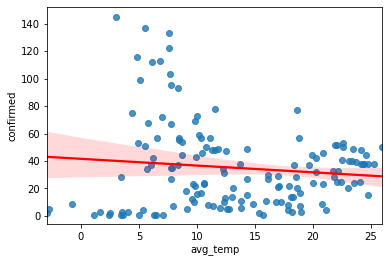

In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

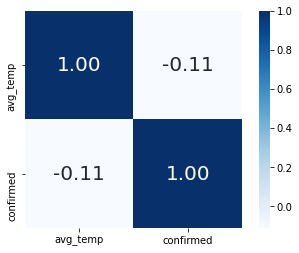

### 결과
> 코로나 초기에 하절기(6월부)가 되면 평균 기온 상승으로 인한 확진자 감소를 보일것이라 전망하였다.  
위의 분석에 따르면 평균기온이 상승함에 따라 확진자 발생 비율은 점차 감소하는 추세를 보이긴 하였지만, 확진자 감소 요인은 평균 기온의 상승 뿐만이 아닌 외적인 요소의 영향을 배제할 수 없기 때문에 유의미한 관계라고 단정지을 순 없다.

## [시각화 주제 4] 광역단위별 슈퍼 전파자 현황

해당 분석에서는 **10명 이상에게 전파를 한 사람을 슈퍼 전파자로 정의**하고 진행한다.

### 슈퍼전파자 기준

> '슈퍼 전파자(super-spreader)'란?
>
>① 세계보건기구(WHO)는 2003년 사스(SARS·중증급성호흡기증후군) 당시 '슈퍼 전파자'는 '다수의 개인에게 질병을 퍼뜨리는 사람(who have been implicated in spreading the disease to numerous other individuals)'이라고 설명했다.
>
>② 국제감염학회지에 실린 한 논문(Stein, Richard A. (2011). "Superspreaders in Infectious Disease". International Journal of Infectious Diseases. 15 (8): 510–513)은 아래와 같이 규정한다.
>
> "소수의 사람들이 다른 사람들보다 특히 많은 감염 사례에 영향을 미치는 '20대 80의 원칙'이 존재하며, 이 원칙은 몇몇 생물 종들의 병원체 감염에 영향을 주는 것으로 나타난다. 그리고 다른 사람보다 훨씬 많이 2차 감염을 유발하는 사람들은 '슈퍼 전파자'로 알려져있다."
>
> 감염병 창궐 때 특정인이 다른 사람보다 훨씬 더 많은 2차 감염을 유발하는 경우가 많기 때문에 생긴 용어로 보인다.
>
> ③ 우리 국립국어원이 제공하는 오픈사전인 우리말샘에도 나오는데, '주로 나이가 들고 기저 질환이 있는 감염자로, 면역 체계가 망가져 고농도의 바이러스를 보유하게 되면서 많은 사람에게 감염을 일으키는 사람'이라고 밝힌다.
>
> **간단히 설명하면 '슈퍼 전파자'는 '특별히 질병을 많이 퍼뜨리는 사람', '2차 감염을 많이 일으키는 사람'이다.**
> 
> **의학계에 아직 '슈퍼 전파자'에 대한 합의된 기준은 없다. 특히 몇 명에게 병을 옮겨야 되는지에 대한 기준이 부재합니다. 슈퍼 전파자가 왜 생기는지에 대한 확정적인 이론도 없다.**


https://news.kbs.co.kr/news/view.do?ncd=4380909

In [8]:
patient = pd.read_csv('PatientInfo.csv')

In [9]:
patient.isnull().sum()    # 환자정보 데이터: infected_by 결측값 확인(3819)

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [10]:
count_p = patient['infected_by'].value_counts()   # 고유값의 개수 총 606명의 전파자
count_p

2000000205    51
4100000008    27
1400000209    24
2000000167    24
4100000006    21
              ..
6002000039     1
1000000116     1
1100000001     1
1500000110     1
1000000127     1
Name: infected_by, Length: 606, dtype: int64

In [11]:
patient['infected_by'].value_counts(normalize=True)   # 감염전파자 빈도수 확인

2000000205    0.037890
4100000008    0.020059
1400000209    0.017831
2000000167    0.017831
4100000006    0.015602
                ...   
6002000039    0.000743
1000000116    0.000743
1100000001    0.000743
1500000110    0.000743
1000000127    0.000743
Name: infected_by, Length: 606, dtype: float64

In [12]:
top50 = count_p.head(50)      # 전파력 TOP 50: 상위 top17, 10명 이상 전파자로 한정

In [13]:
top50 = count_p.head(50)      # 전파력 TOP 50: 상위 top17, 10명 이상 전파자로 한정

In [14]:
top50[0:17]            # top 17 별도 저장

2000000205    51
4100000008    27
1400000209    24
2000000167    24
4100000006    21
2000000309    21
1000000125    18
1200000031    17
2000000508    17
2000000476    15
2000001153    15
1400000102    12
2000001076    11
2000000125    11
2000000835    11
1500000049    10
2000000908    10
Name: infected_by, dtype: int64

In [16]:
super_p =  pd.read_csv('super_infecter.csv')


super_p # 슈퍼 전파자 top17의 정보

Top 17  infected_by           province     sex  age   latitude  \
0   2000000205           51        Gyeonggi-do  female  70s  37.405663   
1   4100000008           27  Chungcheongnam-do  female  40s  36.808726   
2   1400000209           24            Incheon  female  NaN  37.456188   
3   2000000167           24        Gyeonggi-do  female  40s  37.506966   
4   4100000006           21  Chungcheongnam-do  female  40s  36.779905   
5   2000000309           21        Gyeonggi-do  female  80s  37.361757   
6   1000000125           18              Seoul  female  50s  37.275119   
7   1200000031           17              Daegu  female  60s  35.872150   
8   2000000508           17        Gyeonggi-do  female  40s  36.987759   
9   2000001153           15        Gyeonggi-do     NaN  NaN  37.335819   
10  2000000476           15        Gyeonggi-do  female  80s  37.731986   
11  1400000102           12            Incheon     NaN  NaN  37.380488   
12  2000001076           11        Gyeonggi-do     NaN  NaN  37.407894   
13  2000000835           11        Gyeonggi-do     NaN  NaN  37.329639   
14  2000000125           11        Gyeonggi-do  female  80s  37.342735   
15  2000000908           10        Gyeonggi-do     NaN  NaN  37.177781   
16  1500000049           10            Daejeon  female  60s  36.350621   

     longitude Unnamed: 7  
0   127.116278        성남시  
1   127.197240        천안시  
2   126.705920        NaN  
3   126.789805        부천시  
4   127.004157        아산시  
5   126.935446        군포시  
6   126.977977        NaN  
7   128.601783        NaN  
8   127.114414         평택  
9   126.945378        군포시  
10  127.072855        의정부  
11  126.655804        NaN  
12  126.931212         안양  
13  126.891026        군포시  
14  127.111371        성남시  
15  126.837389         화성  
16  127.384744        NaN

In [17]:
### 주어진 자료로 아래와 같이 지역별 확진자 시각화

map = folium.Map(location = [37.566953,126.977977], zoom_start = 6, width='70%')

list1 = []
list2 = []
marker_cluster = MarkerCluster().add_to(map)

for a in super_p.index:
    folium.Marker(location = [super_p.loc[a,"latitude"],super_p.loc[a,"longitude"]],
                  popup= super_p.loc[a,"infected_by"]).add_to(marker_cluster)
    list1.append(super_p.loc[a,"latitude"])
    list2.append(super_p.loc[a,"longitude"])

map

### 결과
> 슈퍼확진자의 10명(58.8%)가 경기도에 있으며, 충청남도 2명(11.8%), 인천에 2명(11.8%), 서울 1명, 대구 1명, 대전 1명이 있다. 확진자의 정보를 알 수 없는 5명을 제외하고, 모두 여성이며 모두 40대 이상이다. '주로 나이가 들고 기저 질환이 있는 감염자로, 면역 체계가 망가져 고농도의 바이러스를 보유하게 되면서 많은 사람에게 감염을 일으키는 사람'이라고 밝힌바와 같이 슈퍼 전파자로 분류된 환자들은 나이가 전반적으로 중장년에서 노령에 속했다.